# loop data handling and processing

### *the code below helps calculate the daily, hourly average traffic volume based on the given data (collected from WSDOT loop: https://tracflow.wsdot.wa.gov/contourdata/brainscan)*

## We separate the code into three parts for sharing
### 1. Needed packages 
### 2. Utility functions
### 3. Examples  da

## 1. Needed packages

In [1]:
import pandas as pd
from pandas import *
import numpy as np
import os
from datetime import *
import statistics as stat
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import csv
from zipfile import ZipFile
from matplotlib.pyplot import figure
import matplotlib

## 2. Utility functions
After you download the data from WSDOT loop, you will receive some zip files the function below helps you unzip the file, check if the loop encounter with a large number of missing data issues based on your interested date period, and keep the .xlsx file only.
Note: The volume sheet under the excel file should look like below:
column should follow: year-month-day hour:minute:second,
row (here we use hourly average) should follow: hour:minute:second

- input: 
    - filepath: file path you store the zip file 
    - date1: start date 
    - date2: end date
- output: 
    - .xlsx files from the zip file which have data based on your given date period
    - Calculated daily, hourly traffic volume and its corresponding plot

In [ ]:
# the detailed data format is shown below

In [2]:
dt = pd.read_excel("../acbcao/005es16237_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx", sheet_name="Volume",index_col=0)
dt.head()

,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,...,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31
00:00:00,1309,1481,1180,1058,881,852,912,1509,1560,1018.0,...,1076,-1,1640,1405,1052.0,1095,1038,1159,1596,1644
01:00:00,868,948,741,727,645,618,647,945,949,615.0,...,738,-1,1018,618,681.0,679,750,688,945,1017
02:00:00,680,278,595,617,619,545,669,756,784,580.0,...,717,-1,782,671,672.0,626,677,726,766,759
03:00:00,700,-5,1083,1081,1067,1127,1149,809,595,1170.0,...,1353,-1,642,1245,1268.0,1302,1241,1255,768,643
04:00:00,1224,-5,3061,3096,3109,3116,3280,1431,916,3721.0,...,3436,-1,911,3523,3423.0,3494,3460,3337,1256,914


In [3]:
date = list(dt.columns)
nameslst = []
for i in range(len(date)):
    dates = datetime.strptime(str(date[i]),'%Y-%m-%d %H:%M:%S')
    if dates >= datetime(2019,2,4,0,0) and dates<=datetime(2019,3,2,0,0):
        a = []
        a.append(date[i])
        nameslst.append(a)   

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '005es16186_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16237_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16272_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16272_MS__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16302_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16319_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16377_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16396_MS__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16426_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16466_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16513_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16513_MS__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16551_MS__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16583_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16583_MS__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '005es16640_MS__ MTWThFSaS Jan-Mar 2019 _60m.xlsx',
 '3 weeks after closure (I5, AM peak, weekday).jpg',
 '5N.zip',
 '5S.zip',
 'acbcacp_plot.pptx',
 'acbcacp_plot_05012020.pptx',
 

In [34]:
# unzip the file and process the data
def raw_data_process(filepath, date1, date2):
    # get all the files under the given path
    folders = os.listdir(filepath)
    # check the zip file and unzip them all
    for i in folders:
        if i[-3:] == 'zip':
            zip = ZipFile(filepath+i)
            zip.extractall(path=filepath)

    files = os.listdir(filepath)
    # get current xlsx file and remove the .png file  
    dtfiles = []
    index = 0
    for i in files:
        if i[-4:] == 'xlsx':
            dtfiles.append(filepath+i)
        if i[-3:] == 'png':
            os.remove(filepath+i)
        # if other files detected, print a caution, the other files which not directly
        # from the folder may cause some error for the other function
        # set up an index to detect such situation to avoid repeated print
        elif index == 0 and i[:-4]!='xlsx' and i[-3:]!='png':
                print('Caution: there are other files detected except the zipped file in the given folder')
                print('Warning: other files may cause error for other functions')
                index = index + 1
                      
            
    # check data and delete .xlsx fle with missing data only with the period you are interested
    for excel in dtfiles:
        dt = pd.read_excel(excel, sheet_name='Volume', index_col=0)
        col =  list(dt.columns)
        a = 0 
        for coln in col:
            try:
                if datetime.strptime(str(coln),'%Y-%m-%d %H:%M:%S') >= date1 and datetime.strptime(str(coln),'%Y-%m-%d %H:%M:%S') <= date2:
                    a = a+sum(dt[coln])
            except:
                print('Colume format error, check if colume name follows date format: year-month-day hour:minute:second')
        if a < 0:
            os.remove(excel)

# data processing
# here we tide the data into ditrect format
# the output looks like {loopid:{time period:{datetime:[vol]}}} where vol is ordered by hour
# e.g., {'005es16186_MN':'BC':datetime(2019,1,5,0,0):[100, 200, 300,...]}
# create the dict followed by the format
def makeloopvol(periodlst, pathfile):  
    # get current pathfile
    dtfiles = get_datafile(pathfile)
    loop_vol = {}
    for excel in dtfiles:
        # get the index of loop id from the .xlsx path
        # the excel name should look similar as th eformat below:
        # "005es16186_MN__ MTWThFSaS Jan-Mar 2019 _60m.xlsx"
        # the loop id looks like 005es16186_MN where 005 is the route, 16186 is the milepost for the loops
        # MN is the direction, in this example, MN stands form North bound
        # here we call getloopidindex to locate the loopid based on its excel path
        index1,index2 = getloopidindex(excel)
        loop_vol[excel[index1:index2]] = {}
        for period in periodlst:
            loop_vol[excel[index1:index2]][period] = {}
    return(loop_vol)

def getloopidindex(excel_path):
    direction = ['MN_', 'MS_', 'MW_', 'ME_']
    for direct in direction:
        if direct in excel_path:
            index = excel_path.index(direct[1:])
            # return the location of the loopid based on the excel path string
            # 12 is the length of the loopid, e.g., 005es16186_MN
            return(index-12, index+1)
            break  

# get current .xlsx in the folder
def get_datafile(pathfile):
    files = os.listdir(pathfile)
    dtfiles = []
    for i in files:
        if i[-4:] == 'xlsx' and i[0]!='~':
            dtfiles.append(pathfile+i)
    return(dtfiles)

# if negative value is found for volume (regarding as missing value), convert them to zero
def convert_negative_val(lst):
    a = 0
    tup = np.nonzero(lst)
    for i in tup:
        cklst = i
    for i in range(len(lst)):
        if lst[i] < 0:
            lst[i] = 0
    return(lst)

# get loop volume
def get_loop(t1, t2, dt, day, period, loopid, loop_vol, date):                    
    if date >= t1 and date <= t2:
        volst = convert_negative_val(list(dt[day]))
        if volst != None:
            loop_vol[loopid][period][date] = []
            loop_vol[loopid][period][date] = volst
    return(loop_vol)
            
def excel_processing(pathfile, periodlst, time_bond, loop_vol, sheetname):
    dtfiles = get_datafile(pathfile)
    for excel in dtfiles:
        dt = pd.read_excel(excel, sheet_name=sheetname, index_col=0)
        # get the index of loop id from the .xlsx path
        index1,index2 = getloopidindex(excel)
        loopid = excel[index1:index2]
        daylst = list(dt.columns)
        hourlst = list(dt.index)
        # check data availability during befor closure period
        for day in daylst:
            date = datetime.strptime(str(day),'%Y-%m-%d %H:%M:%S')
            loop_vol = get_loop(time_bond[0], time_bond[1], dt, day, periodlst[0], loopid, loop_vol, date)
            loop_vol = get_loop(time_bond[2], time_bond[3], dt, day, periodlst[1], loopid, loop_vol, date)
            loop_vol = get_loop(time_bond[4], time_bond[5], dt, day, periodlst[2], loopid, loop_vol, date)
    return(loop_vol)

#get latitude and longitude for each loop
def get_loop_location(loopvol, pathfile):
    dtfiles = get_datafile(pathfile)
    # create a loc direct to stire lat, lon for each loop id
    loc = {}
    for i in loopvol:
        loc[i] = []
    for j in dtfiles:
        dt = pd.read_excel(j, sheet_name='Metadata')
        index1,index2 = getloopidindex(j)
        loc[j[index1:index2]] = list(dt.iloc[0][1:])
    return(loc)

# calculate the value
# calculate daily average by loop within a week (by day, mor_peak, eve_peak)
# calculate daily average (by Sat, Sun, Mon,...) by day
def CalVol(loopvoldict, t1, t2, d1, d2):
    wkavg_loop = {}
    davg_loop = {} 
    for lpid in loopvoldict:
        # create dict to store daily and weekly average
        wkavg_loop[lpid] = {}
        davg_loop[lpid] = {}
        pdlst = list(loopvoldict[lpid].keys())
        for pd in pdlst:
            wkavg_loop[lpid][pd] = 0
            davg_loop[lpid][pd] = {}
            date_time = list(loopvoldict[lpid][pd].keys())
            # call the CalWeekAvg function to calculate the weekday traffic volume average for each loop id
            wkavg_loop[lpid][pd] = CalWeekAvg(loopvoldict, date_time, lpid, pd, t1, t2, d1, d2)
            # call the CaldailyAvg function to calculate the daily traffic volume average for each loop id
            davg_loop[lpid][pd] = CaldailyAvg(loopvoldict, date_time, lpid, pd, t1, t2, d1, d2)
    return(wkavg_loop, davg_loop)

def CalWeekAvg(loopdict, datetime, loopid, period, t1, t2, d1, d2):
    vol = 0
    n = 0 
    for day in datetime:
        if day.weekday() >= d1 and day.weekday() <= d2:
            loopvol = loopdict[loopid][period][day][t1:t2]
            vol = vol + sum(loopvol)
            n = n + np.count_nonzero(loopvol)
    if n == 0:
        #uncomment for the code below to check detailed id information identified with missing data
        #print('loopid:', loopid, 'has identified with missing data when calculating weekly average at', period, 'period')
        avg = 0
    else:   
        avg = round(vol/n, 3)  
    #return the average traffic volume based on given daily and hourly bound
    return(avg)

def CaldailyAvg(loopdict, datetime, loopid, period, t1, t2, d1, d2):
    DailyAvg = {}
    for day in datetime:
        # the bound defined for different days
        if day.weekday() >= d1 and day.weekday() <= d2:
            DailyAvg[day] = []
            loopvol = loopdict[loopid][period][day][t1:t2]
            vol = sum(loopvol)
            n = len(np.nonzero(loopvol)[0])
            if n == 0:
                #uncomment for the code below to check detailed id information identified with missing data
                #print('loopid:', loopid, ' has identified with missing data when calculating daily average at ', period, ' period')
                avg = 0
            else:
                avg = round(vol/n, 3)

            DailyAvg[day].append(round(vol,3))
            DailyAvg[day].append(n)
            DailyAvg[day].append(avg) 
    #return a list which contains the total loop vol, number of n calculated in the loops,
    #and the calculated average 
    return(DailyAvg)

# calculate hourly average of traffic volume
def CalHourAvg(loopvoldict, d1, d2, direct, route):
    loop_list = []
    for lpid in list(loopvoldict.keys()):
        if lpid[:3] in route and lpid[-1] in direct:
            loop_list.append(lpid)

    # create dict for hourly average calculation
    avg_lp_hr = {} # dict for hourly average of each loop
    avg_hr = {} # dict for hourly average based on all loops
    periodlst = {}
    for pd in loopvoldict[loop_list[0]]:
        avg_lp_hr[pd] = {}
        avg_hr[pd] = {}
        periodlst[pd] = {}
    #get hourly volume from the selected date
    for pd in periodlst:
        for lpid in loop_list: 
            daylst = list(loopvoldict[loop_list[0]][pd].keys())
            periodlst[pd][lpid] = {}
            for h in range(24):
                periodlst[pd][lpid][h] = []
                for d in daylst:
                    if d.weekday()>= d1 and d.weekday()<=d2:
                        periodlst[pd][lpid][h].append(round(loopvoldict[lpid][pd][d][h],3))

    for pd in periodlst:
        for lpid in loop_list:
            avg_lp_hr[pd][lpid] = {}
            avg_hr[pd] = {}
            for h in range(24):
                avg_lp_hr[pd][lpid][h] = []
                avg_hr[pd][h] = []
                sum_vol = round(sum(periodlst[pd][lpid][h]),3)
                num = len(np.nonzero(periodlst[pd][lpid][h])[0])
                # calculate the sum of hourly traffic volume for a specific loop
                # calculate the total avaiable data count
                avg_lp_hr[pd][lpid][h].append(sum_vol)
                avg_lp_hr[pd][lpid][h].append(num)
                if num == 0:
                    avg_lp_hr[pd][lpid][h].append(0)
                else:
                    # calculate the daily average
                    avg_lp_hr[pd][lpid][h].append(round(sum_vol/num, 3))
    
    for pd in periodlst:
        for i in range(len(loop_list)):
            for h in range(24):
                if i == 0:
                    avg_hr[pd][h] = list(avg_lp_hr[pd][loop_list[i]][h][:2])
                else:
                    avg_hr[pd][h][0] = avg_hr[pd][h][0] + avg_lp_hr[pd][loop_list[i]][h][0]
                    avg_hr[pd][h][1] = avg_hr[pd][h][1] + avg_lp_hr[pd][loop_list[i]][h][1]
    
    for pd in periodlst:
        for i in range(24):
            avg = round(avg_hr[pd][i][0]/avg_hr[pd][i][1],3)
            avg_hr[pd][i].append(avg)
            
    return(avg_lp_hr, avg_hr)

# calculated the hourly average traffic volume based on different day of all available loops
def getAvgHrbyDay(loopvoldict):
    loop_list = list(loopvoldict.keys())
    # create dict for hourly average calculation
    hrplotlst = {} # dict for hourly average of each loop
    periodlst = {}
    for pd in loopvoldict[loop_list[0]]:
        hrplotlst[pd] = {}    
        periodlst[pd] = {}
   
    for pd in periodlst:
        daylst = list(loopvoldict[loop_list[0]][pd].keys())
        for d in daylst:
            periodlst[pd][d] = {}
            for i in range(24):
                periodlst[pd][d][i] = []
    for lpid in loop_list:
        for pd in periodlst:
            daylst = list(loopvoldict[lpid][pd].keys())
            for d in daylst:
                for i in range(24):
                    periodlst[pd][d][i].append(loopvoldict[lpid][pd][d][i])
                        
    for pd in periodlst:
        for d in list(periodlst[pd].keys()):
            hrplotlst[pd][d] = []        
            for i in range(24):
                sum_vol = sum(periodlst[pd][d][i])
                n = len(np.nonzero(periodlst[pd][d][i])[0])
                if n == 0:
                    avg = 0
                else:
                    avg = round(sum_vol/n, 3)
                hrplotlst[pd][d].append(avg)
    return(hrplotlst)   

def CalallDayAvg(Avglst):
    loop_list = list(Avglst.keys())
    periodlst = list(Avglst[loop_list[0]].keys())
    #create dict to store the data
    allDayAvg = {}
    for pd in periodlst:
        allDayAvg[pd] = {}
    for pd in periodlst:
        daylst = list(Avglst[loop_list[0]][pd].keys())
        for d in daylst:
            allDayAvg[pd][d] = []
    for i in range(len(loop_list)):            
        for pd in periodlst:
            daylst = list(Avglst[loop_list[i]][pd].keys())
            for d in daylst:
                if i == 0:
                    allDayAvg[pd][d] = list(Avglst[loop_list[i]][pd][d])
                else:
                    allDayAvg[pd][d][0] = allDayAvg[pd][d][0]+Avglst[loop_list[i]][pd][d][0]
                    allDayAvg[pd][d][1] = allDayAvg[pd][d][1]+Avglst[loop_list[i]][pd][d][1]
    
    for pd in periodlst:
        daylst = list(allDayAvg[pd].keys())
        for d in daylst:
            if allDayAvg[pd][d][1] == 0:
                allDayAvg[pd][d][2] = 0
            else:
                avg = round(allDayAvg[pd][d][0]/allDayAvg[pd][d][1],3)
                allDayAvg[pd][d][2] = avg
    return(allDayAvg)

# plot data
# plot data based on the calculated traffic volume 
# plot daily average traffic volume at each time period
def plothr(legendlst, loopvoldict,figname):
    figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
    matplotlib.rcParams.update({'font.size': 11,})
    plt.rcParams["font.family"] = "Arial"
    plotdata = getAvgHrbyDay(loopvoldict)
    x = list(range(168))
    fig = plt.figure()
    ax = fig.add_axes([0.8, 0.8, 1, 1]) # main axes
    #tide data so the day starts on Monday
    y = {}
    i = 0
    for p in plotdata:
        y[p] = []
        i = i + 1
        for d in plotdata[p]:
            if d.weekday()>=5:
                pass
            else:
                y[p].extend(plotdata[p][d])
        for d in plotdata[p]:
            if d.weekday()>=5:
                y[p].extend(plotdata[p][d])
        if i == 1:
            ax.plot(x, y[p], 'r')
        elif i == 2:
            ax.plot(x, y[p], '--*b')
        elif i == 3:
            ax.plot(x, y[p], '--k')
        else:
            ax.plot(x, y[p])
        
    #ax.set_title('Hourly average traffic volume based on WSDOT loop data', fontsize=12)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_xticks([0, 24, 48, 72, 96, 120, 144])
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=14)
    ax.set_ylabel("Average traffic volume", fontsize=14) 
    ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.grid(which='major', linestyle='--')
    ax.grid(which='minor', linestyle=':')
    plt.legend(legendlst, loc='lower left', bbox_to_anchor=(1., 0.5), fontsize=13)
    plt.savefig(figname, bbox_inches = 'tight', transparent=True, pad_inches=0) 
    plt.show()

# plot hourly average traffic volume at each time period
def hourlyplot(Avghourdicts, notes, legendlst, figname):
    figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
    matplotlib.rcParams.update({'font.size': 11,})
    plt.rcParams["font.family"] = "Arial"
    #create a dic to store the data
    hourdic={}
    for period in Avghourdicts:
        hourdic[period] = []
        x =  list(range(len(Avghourdicts[period])))
    #create figure to plot the data
    fig = plt.figure()
    ax = fig.add_axes([0.8, 0.8, 1, 1]) # main axes
    
    #get the average hourly data
    #set up an index a to plot the volume in different time period seperately
    a = 0
    for pd in Avghourdicts:
        a = a+1
        for hr in Avghourdicts[pd]:
            hourdic[pd].append(Avghourdicts[pd][hr][2])  
        if a == 1:
            ax.plot(x, hourdic[pd], 'r')
        elif a == 2:
            ax.plot(x, hourdic[pd],'--*b')
        elif a == 3:
            ax.plot(x, hourdic[pd],'-ok')
        else:
            ax.plot(x, hourdic[pd])

    #ax.set_title('Average traffic volume based on loop data by hour' + notes, fontsize = 14)
    ax.set_xlabel('Hour', fontsize = 14)
    ax.set_ylabel("Traffic volume (vehicles)", fontsize = 14) 
    ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.grid(which='major', linestyle='--')
    ax.grid(which='minor', linestyle=':')
    plt.legend(legendlst, loc='lower left', bbox_to_anchor=(1., 0.5), fontsize=13)
    plt.savefig(figname, bbox_inches = 'tight', transparent=True, pad_inches=0) 
    plt.show()

# save data  
# the data_dict should follow the format {period:traffic volume}
# e.g., {'Before closure':{},'After closure':{}}
def savedailydata(csvname, filepath, loopvoldict):
    data_dict = getAvgHrbyDay(loopvoldict)
    with open (filepath+csvname, 'w', newline='') as csv_file:
        colnames = []
        for period in data_dict:
            colnames.append(period)
        writer = csv.DictWriter(csv_file, fieldnames=colnames)
        
        writer.writeheader()
        day_dict = {}
        
        for period in colnames:
            day_dict[period] = {}
            a=0
            for day in data_dict[period]:
                day_dict[period][a] = day
                a = a+1
            data_len = len(data_dict[period][day])
        
        for i in range(a):
            for j in range(data_len):
                row = {}
                for k in colnames:
                    row[k] = data_dict[k][day_dict[k][i]][j]
                writer.writerow(row)       
            
def saveavghourlydata(csvname, filepath, data_dict):
    with open(filepath+csvname, 'w',newline='') as csv_file:
        colnames = []
        for period in data_dict:
            colnames.append(period)
        writer = csv.DictWriter(csv_file, fieldnames=colnames)
        writer.writeheader()
        
        hour = []
        for h in data_dict[colnames[0]]:
            hour.append(h)
        
        for h in hour:
            row = {}
            for k in colnames:
                row[k] = data_dict[k][h][2]
                
            writer.writerow(row)
    

In [21]:
# run examples
p1 = '../acbcao/'
date1 = datetime(2019,1,5,0,0)
date2 = datetime(2019,3,22,0,0)
raw_data_process(p1, date1, date2)

p2 = '../atbt/'
date1 = datetime(2019,11,2,0,0)
date2 = datetime(2019,11,22,0,0)
raw_data_process(p2, date1, date2)

# check if data is available based on the time of interest
# and delete all the missing data
#bc period
bc1 = datetime(2019, 1, 5, 0, 0)
bc2 = datetime(2019, 1, 11, 0, 0)
#ac period
ac1 = datetime(2019, 1, 12, 0, 0)
ac2 = datetime(2019, 1, 18, 0, 0)
#ao2 period
ao21 = datetime(2019, 3, 16, 0, 0)
ao22 = datetime(2019, 3, 22, 0, 0)
#bt
bt1 = datetime(2019,11,2,0,0)
bt2 = datetime(2019,11,8,0,0)
#at1
at11 = datetime(2019,11,9,0,0)
at12 = datetime(2019,11,15,0,0)
#at2
at21 = datetime(2019,11,16,0,0)
at22 = datetime(2019,11,22,0,0)

acbcao = ['BC','AC','AO2']
atbt = ['BT','AT1','AT2']

# for acbcao
# get current available .xlsx file      
loop_vol1 = makeloopvol(acbcao, p1)
loop_occupancy1 = makeloopvol(acbcao, p1)
acbcao_bond = [bc1, bc2, ac1, ac2, ao21, ao22]

# for atbt
loop_vol2 = makeloopvol(atbt, p2)
loop_occupancy2 = makeloopvol(atbt, p2)
atbt_bond = [bt1, bt2, at11, at12, at21, at22]

#acbcao
loop_vol1 = excel_processing(p1, acbcao, acbcao_bond, loop_vol1, 'Volume')
loop_occupancy1 = excel_processing(p1, acbcao, acbcao_bond, loop_occupancy1, 'Occupancy')
loc1 = get_loop_location(loop_vol1, p1)

#atbt
loop_vol2 = excel_processing(p2, atbt, atbt_bond, loop_vol2, 'Volume')
loop_occupancy2 = excel_processing(p2, atbt, atbt_bond, loop_occupancy2, 'Occupancy')
loc2 = get_loop_location(loop_vol2, p2)

# Daily
# weekday
WeekAvg, DayAvg = CalVol(loop_vol1, 0, 24, 1, 3)
# weekend
WeekAvg_kd, DayAvg_kd = CalVol(loop_vol1, 0, 24, 5, 6)

# morning peak 6:00 am - 10:00 am 
# weekday
WeekAvg_mor, DayAvg_mor = CalVol(loop_vol1, 5, 12, 1, 3)
# weekend
WeekAvg_mor_kd, DayAvg_mor_kd = CalVol(loop_vol1, 5, 12, 5, 6)

# evening peak 3:00 pm - 7:00 pm (15:00 - 19:00)
# weekday
WeekAvg_eve, DayAvg_eve = CalVol(loop_vol1, 15, 20, 1, 3)
# weekend
WeekAvg_eve_kd, DayAvg_eve_kd = CalVol(loop_vol1, 15, 20, 5, 6)

#calculate average hourly traffic volume
AvgLPhr,AvgHr = CalHourAvg(loop_vol1, 0, 6, ['N','S'], ['005','099'])
AvgLPhr_wd_acbc,AvgHr_wd_acbc = CalHourAvg(loop_vol1, 1, 3, ['N','S'], ['005','099'])
AvgLPhr_wk_acbc,AvgHr_wk_acbc = CalHourAvg(loop_vol1, 5, 6, ['N','S'], ['005','099'])
AvgLPhr_wd_atbt,AvgHr_wd_atbt = CalHourAvg(loop_vol2, 1, 3, ['N','S'], ['005','099'])
AvgLPhr_wk_atbt,AvgHr_wk_atbt = CalHourAvg(loop_vol2, 5, 6, ['N','S'], ['005','099'])

# daily avg based on all loops
alldayAvg = CalallDayAvg(DayAvg)
alldayAvg_mor = CalallDayAvg(DayAvg_mor)
alldayAvg_eve = CalallDayAvg(DayAvg_eve)


Caution: there are other files detected except the zipped file in the given folder
Caution: there are other files detected except the zipped file in the given folder


In [13]:
WeekAvg_mor, DayAvg_mor = CalVol(loop_vol1, 6, 10, 1, 3)

In [35]:
WeekAvg, DayAvg = CalVol(loop_vol1, 0, 24, 1, 3)

In [46]:
list(loop_vol1['005es16186_MN']['BC'].keys())

[datetime.datetime(2019, 1, 5, 0, 0),
 datetime.datetime(2019, 1, 6, 0, 0),
 datetime.datetime(2019, 1, 7, 0, 0),
 datetime.datetime(2019, 1, 8, 0, 0),
 datetime.datetime(2019, 1, 9, 0, 0),
 datetime.datetime(2019, 1, 10, 0, 0),
 datetime.datetime(2019, 1, 11, 0, 0)]

In [90]:
def Cal_Avg_Hr(loopdict, t1, t2, d1, d2):
    DailyAvg = {}
    lpidlst = list(loopdict.keys())
    periodlst = list(loopdict[lpidlst[0]].keys())
    
    #find the date we are interested
    daylst = {}
    for acbcao in periodlst:
        daylst[acbcao] = []
        date = list(loopdict[lpidlst[0]][acbcao].keys())
        for day in date:
            if day.weekday()>=d1 and day.weekday()<=d2:
                daylst[acbcao].append(day)
        
    for loop_id in loopdict:
        DailyAvg[loop_id] = {}
        for acbcao in periodlst:
            DailyAvg[loop_id][acbcao]=[]
            for i in range(t1, t2):
                DailyAvg[loop_id][acbcao].append([])
            for day in daylst[acbcao]:
                for j in range(t1, t2):
                    DailyAvg[loop_id][acbcao][(j-t1)].append(loopdict[loop_id][acbcao][day][j])
    
    #calulate vol
    for loop_id in DailyAvg:
        for studypd in DailyAvg[loop_id]:
            for i in range(len(DailyAvg[loop_id][studypd])):
                if sum(DailyAvg[loop_id][studypd][i])!=0:
                    DailyAvg[loop_id][studypd][i] = round(sum(DailyAvg[loop_id][studypd][i])/(np.count_nonzero(DailyAvg[loop_id][studypd][i])),3)
                else:
                    DailyAvg[loop_id][studypd][i] = 0
    
    return(DailyAvg)            

In [94]:
vol = Cal_Avg_Hr(loop_vol1, 5, 9, 1, 3)

In [122]:
x = list(range(5,12))
x
xlabels = []
for i in x:
    xlabels.append(str(x)+":00")

In [123]:
xlabels

['[5, 6, 7, 8, 9, 10, 11]:00',
 '[5, 6, 7, 8, 9, 10, 11]:00',
 '[5, 6, 7, 8, 9, 10, 11]:00',
 '[5, 6, 7, 8, 9, 10, 11]:00',
 '[5, 6, 7, 8, 9, 10, 11]:00',
 '[5, 6, 7, 8, 9, 10, 11]:00',
 '[5, 6, 7, 8, 9, 10, 11]:00']

In [145]:
def plotvolandoccu(legendlst, loopvoldict, occupancydict, t1, t2, d1, d2):
    figure(num=None, figsize=(6, 4), dpi=160, facecolor='w', edgecolor='k')
    matplotlib.rcParams.update({'font.size': 11,})
    plt.rcParams["font.family"] = "Arial"
    vol = Cal_Avg_Hr(loopvoldict, t1, t2, d1, d2)
    occupancy = Cal_Avg_Hr(occupancydict, t1, t2, d1, d2)
    loopid = list(vol.keys())
    studypd = list(vol[loopid[0]].keys())
    x = list(range((t1+1),(t2+1)))
    xlabels = []
    for i in x:
        xlabels.append(str(i)+":00")
    for ids in loopid:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3)) # main axes
        
        #tide data so the day starts on Monday
        i = 0
        for studyperiod in studypd:
            print(vol[ids][studyperiod])
            print(occupancy[ids][studyperiod])
            #if studyperiod=='AO2':
            #    pass
            if studyperiod=='AT2':
                pass
            else:
                i = i+1
                if i == 1:
                    ax[0].plot(x, vol[ids][studyperiod], 'r')
                    ax[1].plot(x, occupancy[ids][studyperiod], 'r')
                elif i == 2:
                    ax[0].plot(x, vol[ids][studyperiod], '--*b')
                    ax[1].plot(x, occupancy[ids][studyperiod], '--*b')
                elif i == 3:
                    ax[0].plot(x, vol[ids][studyperiod], '--k')
                    ax[1].plot(x, occupancy[ids][studyperiod], '--k')
                else:
                    ax[0].plot(x, vol[ids][studyperiod])
                    ax[1].plot(x, occupancy[ids][studyperiod])
        
        
        ax[0].set_title('I-5 loopid: '+ids, fontsize=12)
        ax[1].set_title('I-5 loopid: '+ids, fontsize=12)
        ax[0].set_xlabel('hour', fontsize=14)
        ax[1].set_xlabel('hour', fontsize=14)
        ax[0].set_xticks(x)
        ax[0].set_xticklabels(xlabels, fontsize=14, rotation=45)
        ax[1].set_xticks(x)
        ax[1].set_xticklabels(xlabels, fontsize=14, rotation=45)
        ax[0].set_ylabel("Average traffic volume", fontsize=14) 
        ax[1].set_ylabel("Average occupancy", fontsize=14) 
        ax[0].yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
        ax[0].grid(which='major', linestyle='--')
        ax[0].grid(which='minor', linestyle=':')
        ax[1].grid(which='major', linestyle='--')
        ax[1].grid(which='minor', linestyle=':')
        plt.legend(legendlst, loc='lower left', bbox_to_anchor=(1., 0.5), fontsize=13)
        plt.show()

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[6766.222, 6043.0, 5738.0, 4981.0]
[12.644, 30.933, 32.942, 37.917]


<Figure size 960x640 with 0 Axes>

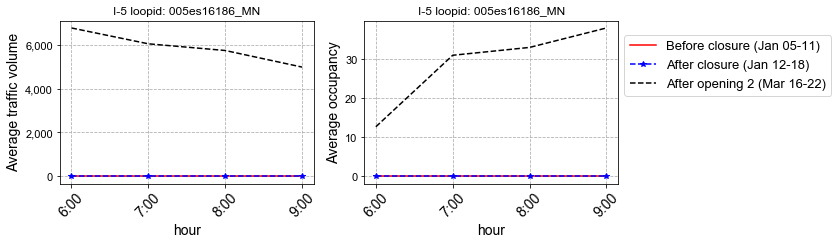

[6046.667, 5299.0, 4245.667, 4096.0]
[11.858, 26.633, 34.292, 35.792]
[5978.333, 4376.0, 3870.333, 3468.333]
[18.383, 33.242, 37.2, 39.883]
[6248.0, 5494.0, 5224.0, 4597.0]
[12.333, 26.008, 30.583, 33.817]


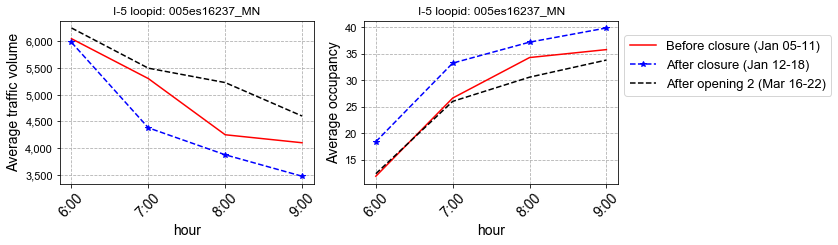

[4789.333, 3982.667, 3099.667, 2963.667]
[9.833, 26.878, 37.867, 39.267]
[4586.333, 3244.667, 2799.667, 2493.0]
[20.6, 37.522, 42.367, 45.778]
[4787.833, 4129.667, 3770.333, 3337.333]
[13.317, 28.522, 32.567, 36.65]


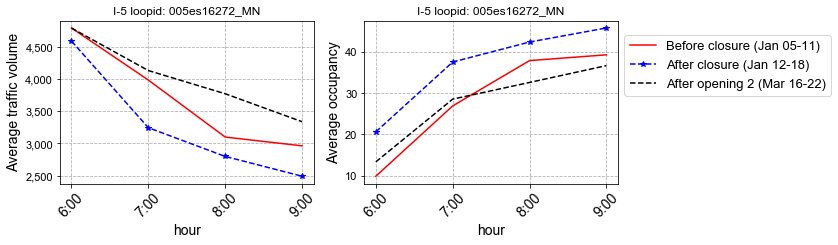

[3848.0, 5722.667, 6046.0, 4906.889]
[5.367, 8.158, 9.175, 8.958]
[4222.333, 5574.0, 5794.333, 5346.667]
[5.808, 7.717, 8.65, 8.858]
[0, 0, 0, 0]
[0, 0, 0, 0]


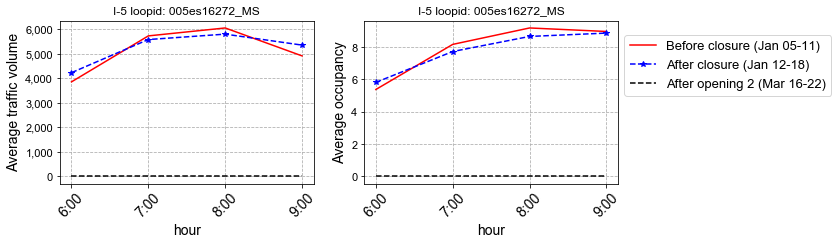

[5040.333, 4260.0, 3284.0, 3191.667]
[14.267, 30.033, 38.311, 39.244]
[4865.667, 3487.333, 3004.333, 2687.333]
[23.806, 38.489, 42.311, 44.456]
[5242.667, 4416.667, 4041.333, 3553.0]
[17.0, 29.067, 32.656, 37.5]


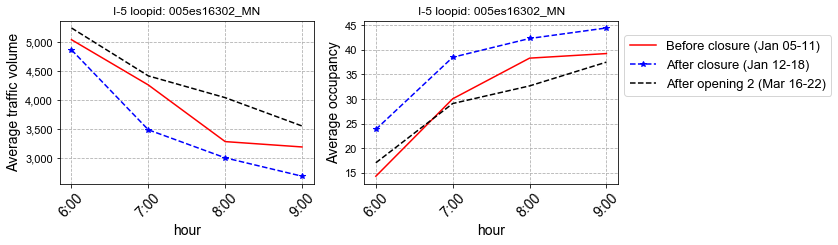

[4811.333, 4011.667, 3100.333, 3012.0]
[11.511, 27.9, 37.378, 37.511]
[4653.333, 3286.667, 2812.0, 2531.0]
[21.4, 37.089, 41.389, 44.0]
[4808.167, 4198.333, 3832.667, 3350.667]
[15.65, 25.9, 28.844, 34.822]


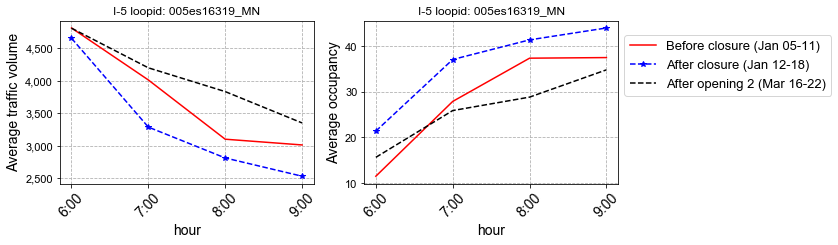

[5610.333, 5270.667, 4355.333, 4284.667]
[16.108, 30.05, 33.0, 34.65]
[5543.667, 4399.667, 4023.0, 3655.333]
[24.733, 33.983, 34.892, 36.558]
[5580.333, 5585.667, 5459.333, 4671.667]
[18.592, 28.292, 29.392, 34.333]


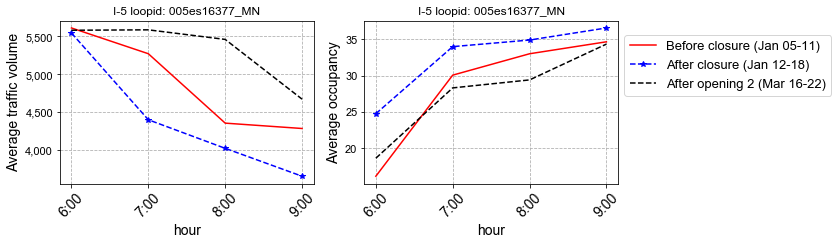

[4133.0, 6179.0, 6675.0, 5925.667]
[9.025, 15.767, 19.858, 16.483]
[4392.0, 6296.0, 6615.667, 5852.333]
[9.467, 15.233, 18.825, 15.55]
[4283.0, 6284.333, 7197.0, 6262.667]
[9.1, 14.517, 19.467, 15.592]


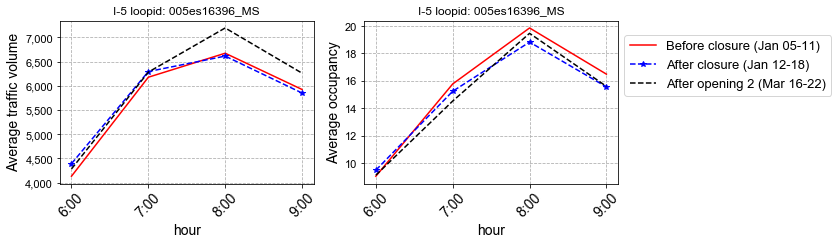

[3328.333, 2763.333, 2604.0, 2531.667]
[7.25, 19.4, 24.4, 23.992]
[3403.667, 2476.333, 2305.667, 2263.667]
[15.358, 25.483, 25.467, 26.083]
[3517.0, 3139.333, 2857.0, 2677.667]
[7.833, 14.733, 21.975, 23.0]


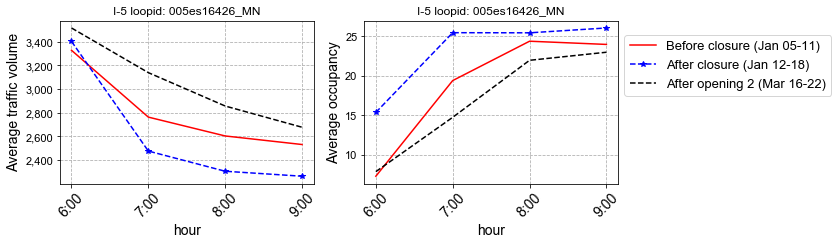

[4411.0, 4083.333, 4032.333, 4205.0]
[7.775, 35.317, 39.208, 39.092]
[4578.333, 3917.0, 3938.0, 3712.333]
[25.533, 39.558, 41.233, 44.258]
[4573.333, 4307.0, 4356.0, 4189.333]
[11.175, 29.325, 39.567, 40.692]


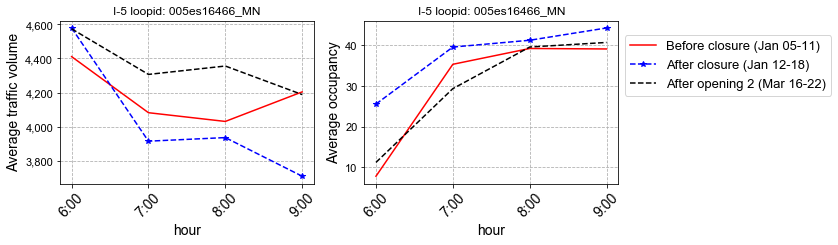

[3855.667, 4482.333, 4518.0, 4709.667]
[9.506, 27.908, 27.083, 27.7]
[4836.667, 4382.0, 4393.333, 4138.778]
[20.8, 27.975, 28.758, 28.825]
[4426.667, 4680.667, 4877.0, 4736.333]
[12.439, 23.983, 27.158, 27.792]


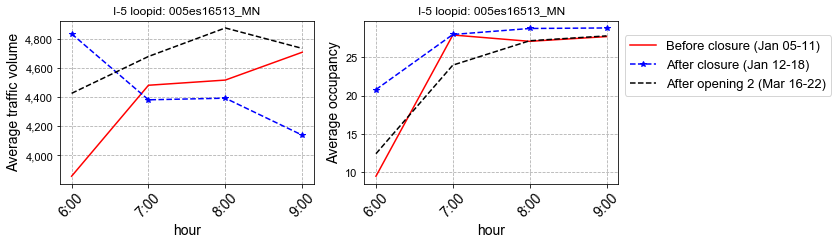

[2072.667, 2748.333, 3106.0, 2400.667]
[5.867, 8.1, 13.517, 11.317]
[2387.333, 3093.0, 3093.0, 2615.667]
[6.55, 10.25, 10.35, 8.833]
[2121.0, 2749.333, 2988.333, 2647.333]
[5.867, 7.917, 9.167, 8.117]


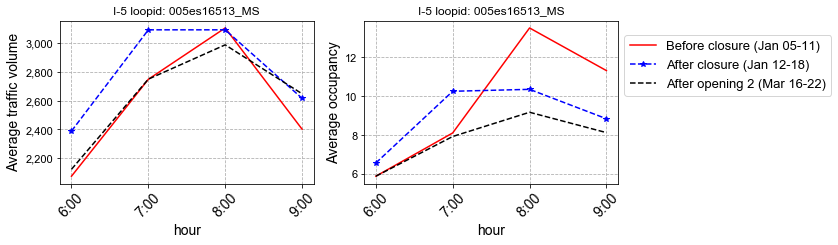

[1698.667, 2448.333, 2516.667, 2064.0]
[4.983, 7.133, 8.5, 7.633]
[2047.667, 2849.667, 2564.333, 2036.667]
[5.8, 8.433, 8.4, 7.25]
[1782.667, 2455.333, 2660.667, 2052.667]
[5.15, 7.133, 8.55, 6.867]


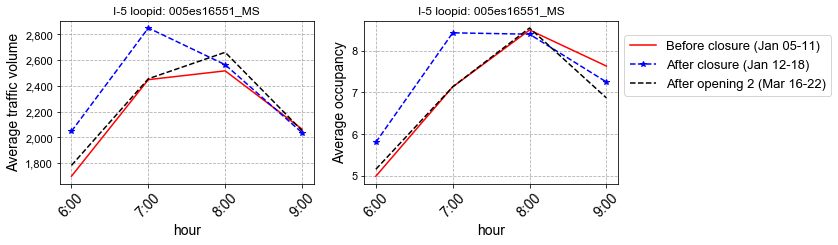

[3986.222, 5271.667, 5990.333, 5961.556]
[6.261, 11.0, 12.35, 11.433]
[4024.667, 5306.0, 5917.556, 5736.333]
[8.008, 8.619, 9.811, 9.683]
[4141.222, 4928.778, 5969.333, 5760.111]
[6.086, 7.286, 9.636, 10.886]


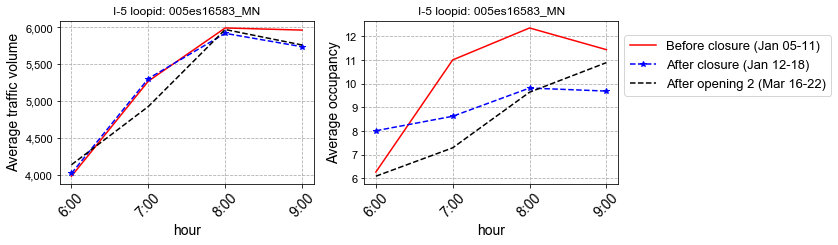

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[3613.333, 5945.333, 6628.444, 5859.333]
[5.903, 10.722, 13.586, 11.95]


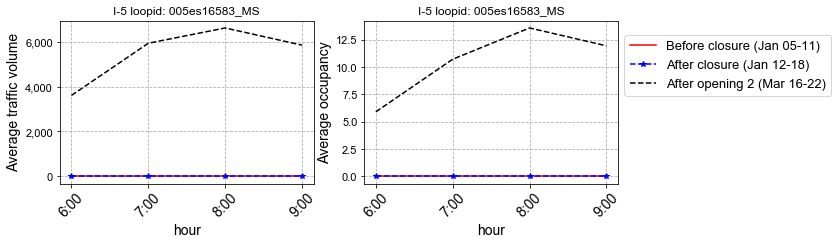

[3906.667, 6202.0, 6296.333, 5945.333]
[5.492, 10.1, 28.317, 27.4]
[4392.667, 6801.778, 6081.667, 5123.333]
[6.067, 11.294, 19.825, 38.233]
[0, 0, 0, 0]
[0, 0, 0, 0]


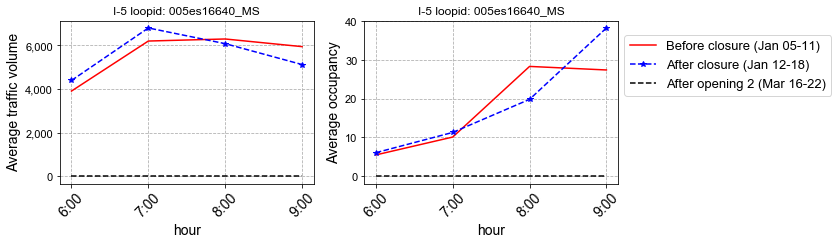

In [146]:
plotvolandoccu(lgacbcao, loop_vol1, loop_occupancy1, 5, 9, 1, 3)

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[3722.0, 6966.667, 6349.0, 5744.0, 4943.0, 4777.0, 5267.0, 5718.0]
[5.425, 10.567, 27.475, 33.0, 37.25, 34.05, 28.425, 25.35]


<Figure size 960x640 with 0 Axes>

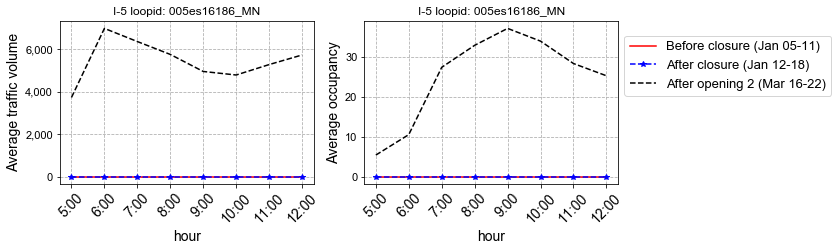

[3096.0, 6327.0, 5136.0, 4245.0, 3975.0, 3895.0, 4402.0, 4955.0]
[4.325, 10.1, 29.35, 35.025, 34.15, 33.1, 30.875, 9.9]
[3690.0, 5765.0, 3910.0, 3869.0, 3173.0, 3534.0, 5056.0, 5475.0]
[5.1, 19.95, 36.4, 36.45, 42.025, 38.925, 13.125, 9.55]
[3416.0, 6306.0, 5745.0, 5181.0, 4597.0, 4372.0, 4645.0, 5283.0]
[4.6, 10.4, 24.075, 32.35, 33.9, 35.6, 27.675, 24.95]


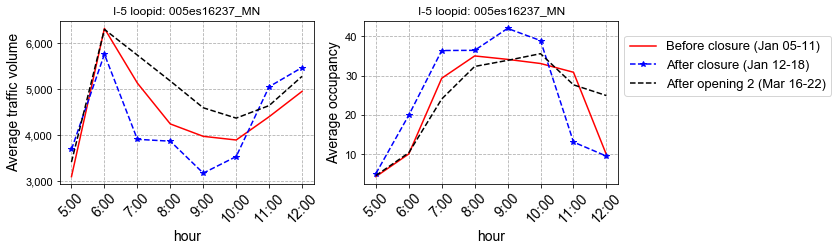

[2466.0, 5030.0, 3746.0, 3080.0, 2920.0, 2896.0, 3064.0, 3846.0]
[4.3, 9.433, 32.1, 37.267, 37.467, 39.5, 36.633, 12.3]
[3020.0, 4152.0, 2844.0, 2784.0, 2203.0, 2577.0, 3973.0, 4356.0]
[5.2, 24.8, 42.0, 43.2, 49.1, 43.967, 14.667, 9.167]
[2754.0, 4979.0, 4316.0, 3709.0, 3348.0, 3093.0, 3305.0, 3824.0]
[4.7, 9.8, 26.467, 33.567, 37.05, 38.667, 33.167, 28.567]


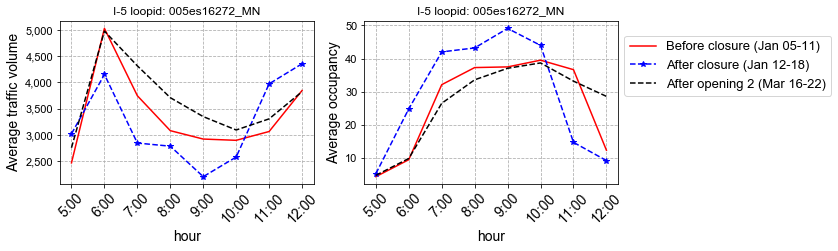

[1971.0, 3861.0, 5835.0, 6069.0, 5246.0, 4805.333, 5477.0, 5398.0]
[3.05, 5.325, 8.175, 9.2, 9.075, 10.933, 10.875, 10.9]
[2152.0, 4237.0, 5556.0, 5680.0, 5405.0, 5241.0, 5182.0, 5382.0]
[3.35, 5.8, 7.8, 8.475, 8.85, 10.1, 16.4, 17.325]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]


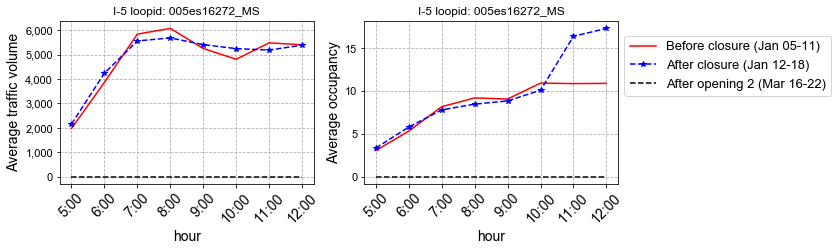

[2635.0, 5142.0, 4005.0, 3298.0, 3139.0, 3102.0, 3267.0, 4038.0]
[6.233, 14.95, 33.233, 38.5, 39.333, 40.167, 38.667, 22.733]
[3193.0, 4419.0, 3048.0, 2964.0, 2390.0, 2779.0, 4280.0, 4628.0]
[7.5, 27.35, 41.767, 42.4, 47.133, 44.0, 20.167, 15.933]
[2942.0, 5340.0, 4553.0, 3979.0, 3544.0, 3289.0, 3495.0, 4088.0]
[6.767, 14.333, 27.4, 32.833, 37.6, 39.667, 35.567, 30.6]


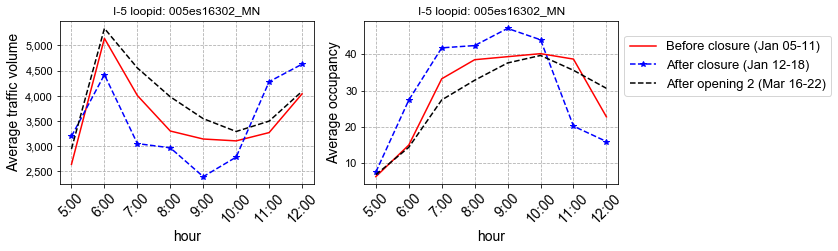

[2478.0, 5027.0, 3747.0, 3099.0, 2943.0, 2924.0, 3090.0, 3762.0]
[4.533, 11.2, 31.667, 36.9, 37.5, 38.567, 36.033, 24.967]
[2991.0, 4415.0, 2878.0, 2792.0, 2254.0, 2645.0, 3973.0, 4301.0]
[5.5, 24.1, 42.067, 40.767, 47.867, 41.833, 20.133, 15.2]
[2751.0, 4984.0, 4318.0, 3763.0, 3332.0, 3136.0, 3336.0, 3858.0]
[4.9, 11.967, 24.867, 29.033, 34.533, 34.933, 32.567, 26.867]


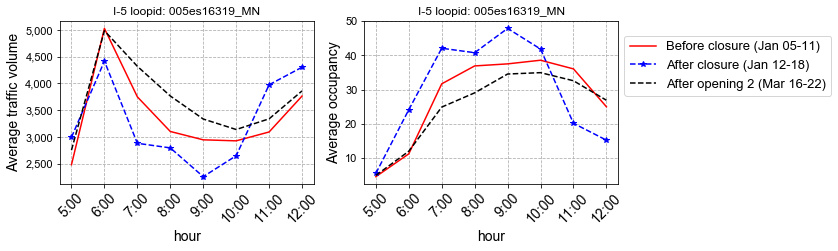

[2817.0, 5809.0, 4979.0, 4253.0, 4150.0, 4215.0, 4304.0, 5250.0]
[5.9, 16.375, 31.275, 33.05, 34.225, 33.025, 33.3, 21.1]
[3441.0, 5154.0, 3784.0, 3994.0, 3270.0, 3922.0, 5630.0, 5874.0]
[7.275, 27.775, 36.175, 33.275, 36.875, 34.775, 23.35, 19.575]
[3116.0, 5715.0, 5635.0, 5386.0, 4708.0, 4356.0, 4684.0, 5325.0]
[6.4, 17.025, 28.6, 28.425, 34.4, 34.925, 30.775, 28.375]


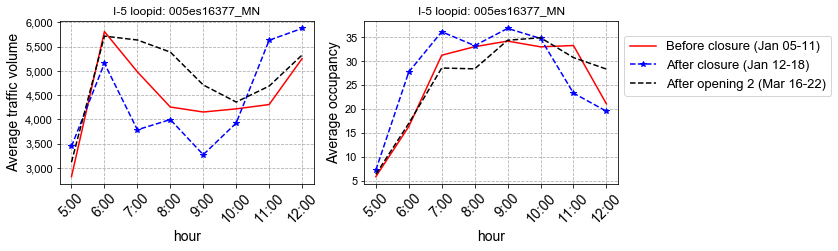

[1903.0, 4111.0, 6316.0, 6718.0, 5733.0, 5621.0, 5718.0, 5368.0]
[4.15, 8.75, 15.35, 17.975, 15.625, 17.3, 17.6, 19.05]
[2061.0, 4456.0, 6354.0, 6414.0, 5974.0, 5581.0, 5932.0, 5814.0]
[4.475, 9.575, 15.325, 17.15, 16.3, 16.125, 17.425, 16.925]
[2039.0, 4299.0, 6295.0, 7282.0, 6177.0, 5898.0, 6079.0, 6236.0]
[4.425, 8.925, 14.525, 19.7, 15.3, 16.4, 21.375, 18.25]


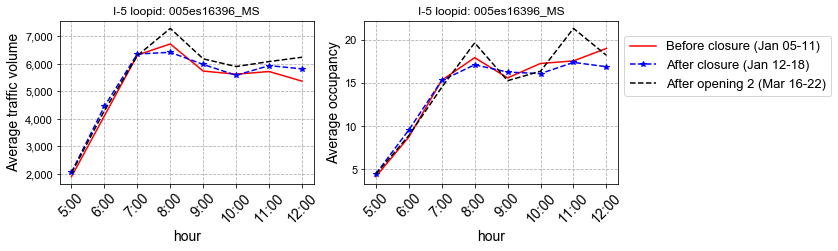

[1907.0, 3505.0, 2576.0, 2681.0, 2424.0, 2433.0, 2547.0, 3047.0]
[3.85, 7.375, 22.075, 24.6, 24.25, 22.775, 22.6, 11.5]
[2333.0, 3291.0, 2357.0, 2280.0, 1912.0, 2521.0, 3093.0, 3565.0]
[4.725, 17.725, 28.175, 25.325, 27.2, 23.575, 13.85, 11.3]
[2110.0, 3542.0, 3512.0, 2694.0, 2837.0, 2848.0, 2722.0, 3430.0]
[4.2, 7.6, 9.4, 23.75, 22.675, 24.025, 21.675, 13.975]


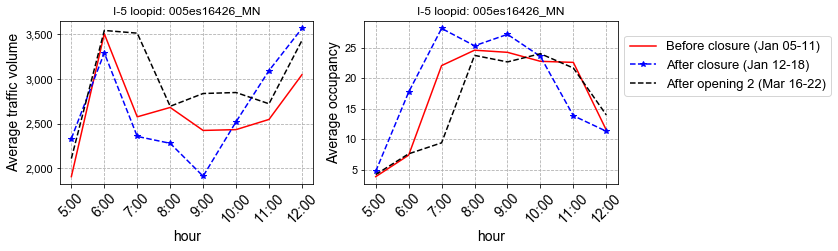

[2282.0, 4528.0, 3845.0, 4024.0, 4087.0, 3980.0, 3735.0, 4191.0]
[3.625, 7.2, 38.975, 38.4, 36.8, 34.45, 31.65, 14.975]
[2841.0, 4329.0, 3499.0, 3954.0, 3295.0, 3798.0, 4008.0, 4758.0]
[4.425, 28.525, 44.35, 41.0, 48.975, 39.7, 32.225, 15.45]
[2542.0, 4616.0, 4446.0, 4305.0, 4274.0, 4085.0, 3930.0, 4694.0]
[3.9, 7.4, 22.125, 39.65, 40.0, 37.0, 35.2, 19.575]


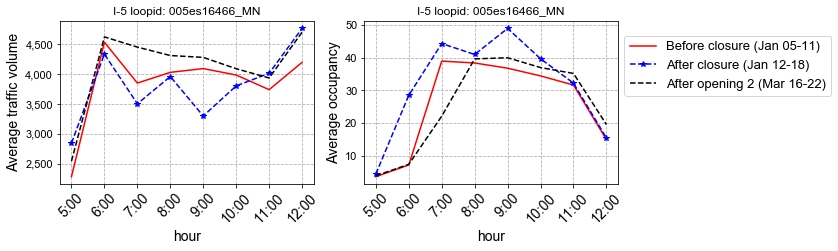

[2282.0, 3522.667, 4173.0, 4574.0, 4551.0, 4426.0, 4071.0, 4448.0]
[3.65, 6.933, 31.8, 26.075, 25.975, 24.8, 23.35, 13.65]
[2927.0, 4558.0, 4001.0, 4388.0, 3589.333, 4248.0, 4465.0, 5089.0]
[4.65, 24.35, 31.925, 28.325, 28.5, 28.1, 25.55, 14.85]
[1662.667, 3780.0, 4770.0, 4842.0, 4831.0, 4562.0, 4396.0, 5076.0]
[2.867, 8.067, 20.35, 27.4, 26.025, 25.6, 24.75, 16.7]


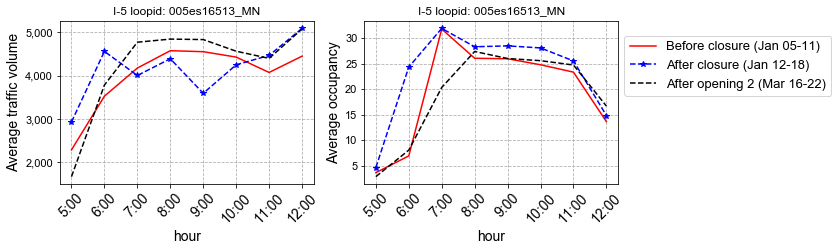

[1332.0, 2024.0, 2406.0, 3178.0, 2632.0, 2591.0, 2835.0, 3211.0]
[3.8, 5.45, 7.7, 15.25, 12.6, 10.55, 11.7, 12.95]
[1514.0, 2402.0, 2806.0, 2979.0, 2690.0, 2747.0, 3059.0, 3361.0]
[4.3, 6.6, 10.7, 9.45, 9.45, 10.4, 11.2, 12.15]
[1476.0, 2142.0, 2414.0, 3264.0, 2628.0, 2691.0, 3141.0, 3350.0]
[4.2, 5.7, 7.8, 9.75, 8.0, 9.45, 24.45, 13.1]


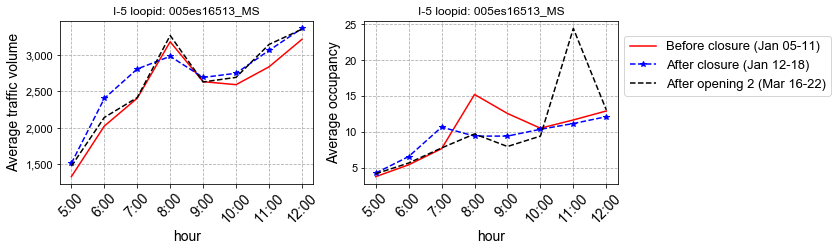

[1254.0, 1701.0, 2513.0, 2528.0, 2084.0, 2147.0, 2465.0, 3048.0]
[3.65, 4.8, 7.2, 8.4, 7.95, 9.55, 11.0, 14.6]
[1454.0, 2044.0, 2961.0, 2382.0, 2146.0, 2282.0, 2673.0, 3217.0]
[4.3, 5.8, 8.9, 7.55, 7.8, 9.55, 11.6, 13.45]
[1368.0, 1801.0, 2467.0, 2703.0, 2035.0, 2144.0, 2711.0, 3184.0]
[4.15, 5.0, 7.3, 8.85, 6.6, 8.15, 16.3, 14.6]


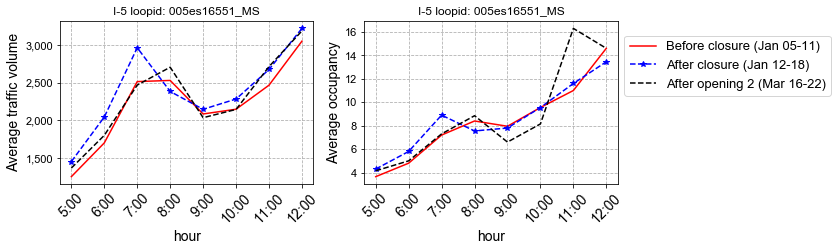

[2141.0, 3430.667, 5071.0, 6030.0, 5812.0, 5816.0, 5693.0, 5243.0]
[3.05, 4.833, 14.275, 15.65, 14.275, 10.575, 10.225, 8.675]
[2603.0, 4326.0, 5342.0, 5830.667, 5450.0, 5807.0, 5432.0, 5623.0]
[3.75, 12.925, 9.625, 9.233, 8.7, 10.575, 11.875, 9.1]
[2384.0, 4569.0, 4634.667, 6236.0, 5557.333, 5935.0, 5919.0, 5157.333]
[3.425, 6.9, 6.633, 10.175, 8.733, 9.925, 10.225, 8.0]


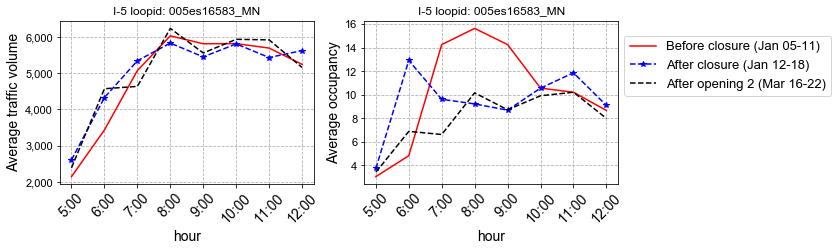

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[2163.0, 3751.0, 6181.0, 6544.0, 5810.0, 5602.0, 6112.0, 6322.0]
[3.675, 6.1, 11.1, 13.667, 11.575, 11.5, 15.125, 15.35]


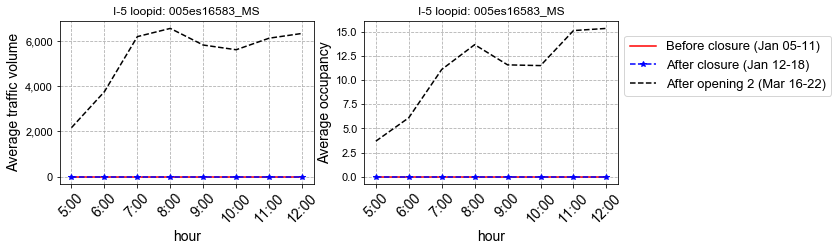

[2071.0, 3988.0, 6349.0, 6321.0, 5642.0, 5878.0, 5669.0, 5849.0]
[2.975, 5.525, 9.625, 30.025, 32.925, 20.325, 11.125, 12.95]
[2352.0, 4421.0, 6777.333, 5247.0, 5183.0, 5272.0, 5723.0, 5894.667]
[3.275, 6.125, 11.267, 19.325, 38.0, 34.075, 10.8, 11.333]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]


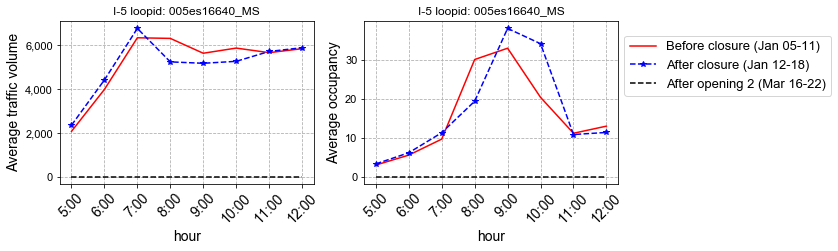

In [147]:
plotvolandoccu(lgacbcao, loop_vol1, loop_occupancy1, 4, 12, 1, 1)

[3492.0, 6614.667, 6424.0, 5641.0, 4636.0, 3945.0, 4862.0, 5803.0]
[5.275, 13.867, 26.65, 32.925, 41.575, 44.325, 25.85, 9.975]
[3532.0, 6432.0, 5262.0, 4513.0, 3599.0, 3858.0, 3244.0, 4630.0]
[5.55, 16.2, 33.175, 39.35, 48.725, 47.85, 44.05, 38.625]
[3373.0, 6354.0, 5604.0, 4475.0, 4134.0, 3886.0, 3735.0, 4506.0]
[5.85, 14.125, 31.15, 40.175, 43.925, 44.625, 49.3, 40.175]


<Figure size 960x640 with 0 Axes>

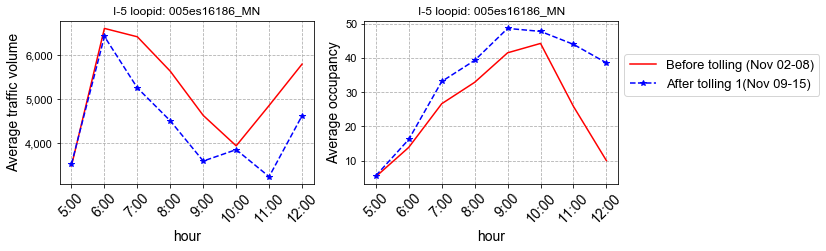

[2527.0, 4869.0, 4394.0, 3659.0, 3016.0, 2785.0, 3072.0, 4090.0]
[4.267, 16.367, 26.7, 31.833, 37.967, 39.767, 36.367, 13.233]
[2545.0, 4579.0, 3656.0, 2999.0, 2185.0, 2554.5, 1517.0, 3265.0]
[4.467, 13.067, 30.767, 37.133, 48.667, 44.5, 55.933, 36.733]
[2363.0, 4525.0, 3829.0, 2975.0, 2644.0, 2665.0, 2439.0, 3308.0]
[4.433, 10.3, 28.933, 39.133, 42.733, 40.4, 45.233, 33.3]


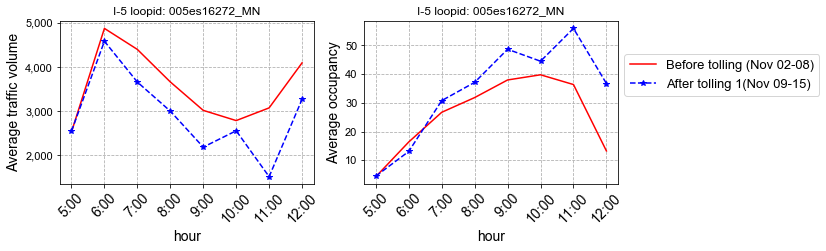

[2696.0, 4912.5, 4693.0, 3911.0, 3225.0, 3025.0, 3334.0, 4294.0]
[6.433, 20.5, 26.133, 34.1, 40.133, 42.367, 36.967, 20.1]
[2696.0, 4905.0, 3912.0, 3197.0, 2358.0, 2718.0, 1696.0, 3567.0]
[6.5, 17.7, 32.5, 37.633, 48.2, 43.2, 57.6, 36.433]
[2508.0, 4799.0, 4089.0, 3209.0, 2839.0, 2891.0, 2663.0, 3583.0]
[6.433, 14.6, 30.467, 39.367, 42.4, 39.9, 45.367, 36.067]


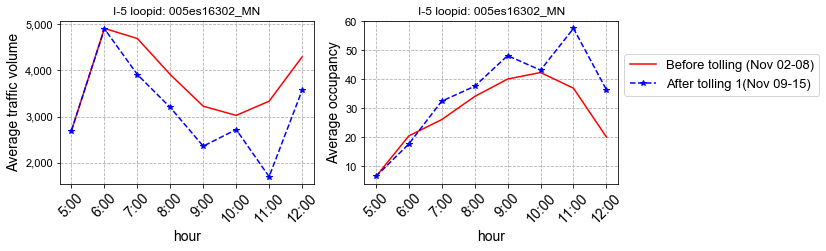

[2500.0, 4825.0, 4446.0, 3689.0, 3052.0, 2802.0, 3127.0, 4034.0]
[4.7, 12.8, 22.4, 32.667, 39.1, 42.9, 36.767, 19.133]
[2520.0, 4561.0, 3693.0, 2970.0, 2217.0, 2496.0, 0, 3384.0]
[4.767, 14.967, 29.1, 35.933, 46.6, 44.0, 0, 33.367]
[2342.0, 4531.0, 3850.0, 2991.0, 2678.0, 2669.0, 2480.0, 3372.0]
[4.767, 12.4, 27.2, 36.7, 40.7, 39.867, 43.833, 34.333]


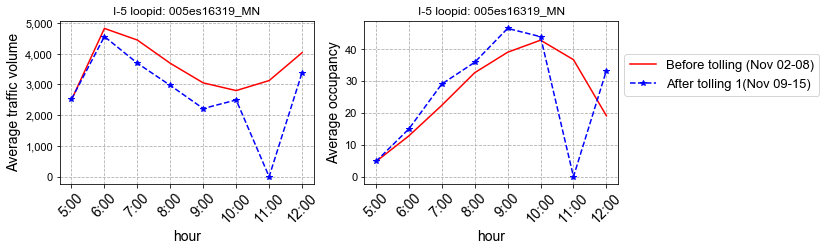

[2839.0, 5756.0, 5794.0, 5022.0, 4263.0, 3895.0, 4392.0, 5516.0]
[5.875, 15.125, 29.525, 34.15, 36.15, 35.85, 32.525, 22.7]
[2906.0, 5297.0, 5011.0, 3970.0, 3337.0, 3538.0, 2380.0, 4831.0]
[6.275, 20.975, 28.15, 35.4, 35.175, 35.1, 34.925, 27.15]
[2827.0, 5387.0, 5125.0, 4125.0, 3943.0, 3799.0, 3470.0, 4808.0]
[7.65, 17.2, 29.45, 34.3, 35.35, 33.975, 35.525, 28.725]


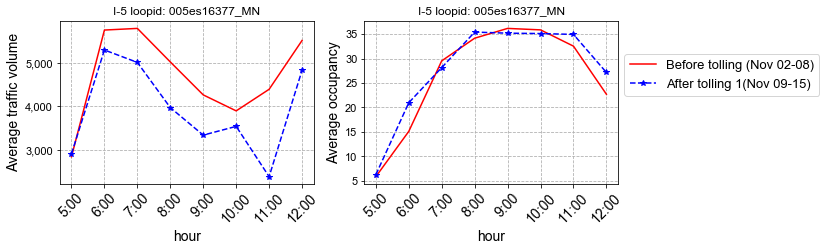

[2022.0, 4268.0, 6314.0, 7165.0, 6144.0, 5883.0, 5988.0, 6124.0]
[4.5, 9.2, 14.875, 17.9, 17.0, 16.725, 17.425, 17.65]
[2073.0, 4394.0, 5756.0, 6428.0, 5903.0, 5786.0, 5902.0, 6140.0]
[4.65, 12.0, 14.975, 26.5, 17.85, 16.45, 24.475, 23.525]
[2189.0, 4365.0, 6173.0, 6574.0, 5961.0, 5630.0, 5760.0, 5001.0]
[6.1, 10.0, 15.725, 21.55, 16.925, 19.075, 24.7, 31.9]


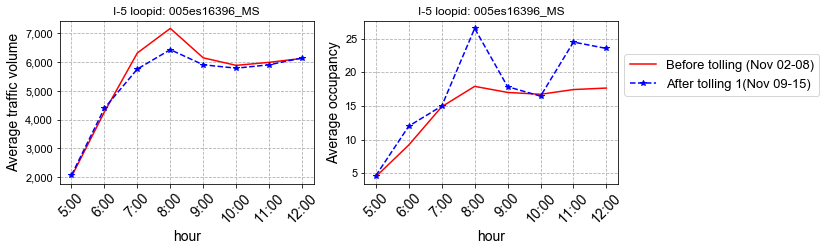

[1934.0, 3479.0, 3492.0, 2867.0, 2462.0, 2070.0, 2581.0, 3425.0]
[3.95, 7.225, 10.4, 25.775, 25.85, 25.05, 23.9, 11.5]
[1945.0, 3121.0, 2822.0, 2177.0, 1752.0, 1967.0, 1519.0, 3222.0]
[4.075, 10.275, 16.575, 27.2, 29.9, 25.65, 26.95, 15.2]
[1812.0, 3135.0, 2997.0, 2358.0, 2099.0, 2129.0, 1951.0, 3063.0]
[4.125, 7.3, 14.5, 24.6, 25.75, 24.625, 24.875, 15.575]


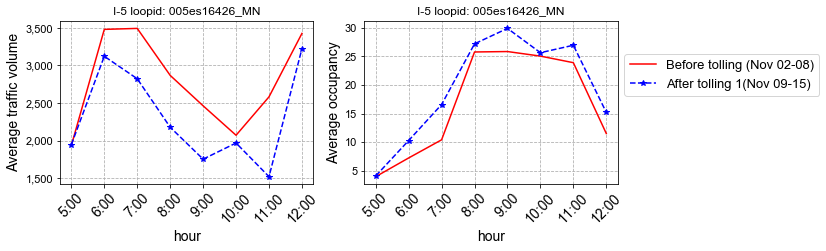

[2288.0, 4491.0, 4504.0, 4319.0, 4219.0, 3937.0, 3777.0, 4586.0]
[3.75, 7.25, 24.475, 39.525, 40.075, 38.6, 34.875, 15.9]
[2356.0, 4214.0, 3946.0, 3645.0, 3168.0, 3694.667, 2996.0, 4632.0]
[3.825, 19.025, 34.225, 41.2, 47.7, 41.467, 41.8, 20.725]
[2239.0, 4249.0, 4132.0, 3917.0, 3771.0, 3688.0, 3489.0, 4460.0]
[3.9, 7.5, 24.325, 38.05, 41.3, 40.9, 39.625, 20.4]


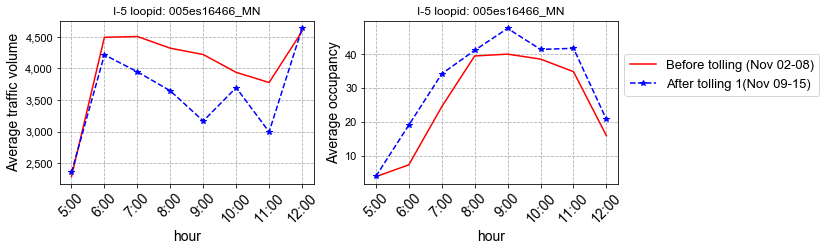

[2335.0, 4658.0, 4901.0, 4772.0, 4727.0, 4420.0, 4118.0, 4878.0]
[3.825, 9.825, 21.725, 26.5, 28.525, 25.95, 22.475, 12.575]
[2381.0, 4379.0, 4246.0, 3946.0, 3553.0, 3648.0, 2850.667, 5033.0]
[3.975, 15.7, 21.75, 25.225, 33.925, 35.125, 29.133, 16.15]
[2266.0, 3368.0, 4395.0, 4374.0, 4185.0, 4067.0, 3905.0, 4759.0]
[3.975, 7.2, 19.95, 23.95, 29.15, 27.375, 23.6, 17.1]


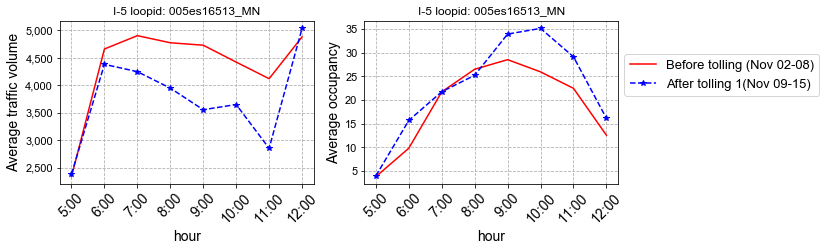

[1611.0, 3312.0, 3491.0, 3506.0, 3357.0, 3316.0, 3183.0, 2516.0]
[3.6, 8.9, 11.7, 12.5, 12.9, 12.9, 12.2, 8.1]
[1729.0, 3164.0, 3211.0, 2953.0, 2539.0, 2571.0, 2501.0, 3104.0]
[4.05, 10.3, 11.8, 18.5, 29.65, 11.6, 16.05, 11.35]
[1621.0, 3204.0, 3223.0, 3223.0, 2985.0, 2908.0, 3107.0, 2972.0]
[4.1, 9.45, 11.45, 13.05, 19.7, 18.45, 16.15, 10.4]


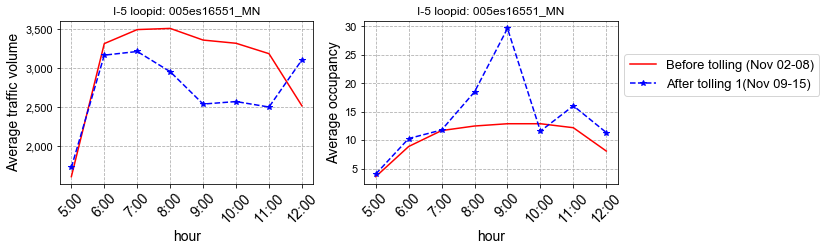

[1348.0, 1864.0, 2453.0, 2667.0, 2026.0, 2180.0, 2446.0, 3070.0]
[4.35, 5.5, 7.35, 8.65, 6.8, 9.4, 10.65, 14.7]
[1405.0, 1933.0, 2127.0, 2432.0, 1975.0, 2079.0, 2507.0, 3090.0]
[4.35, 6.15, 6.75, 8.85, 6.65, 7.45, 16.05, 20.3]
[1401.0, 1937.0, 2473.0, 2406.0, 1894.0, 2019.0, 2535.0, 2705.0]
[4.65, 5.95, 7.9, 8.6, 6.4, 7.8, 12.75, 24.45]


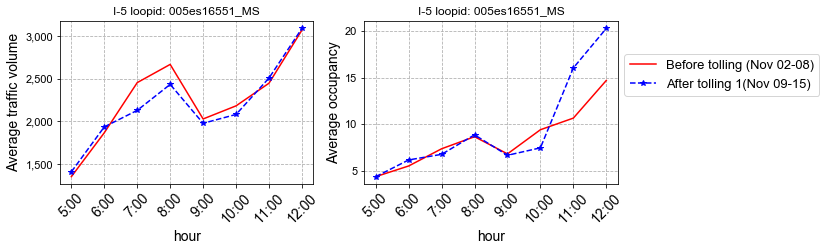

[2025.0, 4416.0, 5676.0, 6197.0, 5845.0, 5906.0, 5806.0, 5334.0]
[2.875, 6.5, 8.925, 10.275, 9.525, 10.275, 10.0, 8.325]
[1522.667, 4314.0, 5232.0, 5426.0, 4846.0, 5055.0, 4816.0, 5217.333]
[2.067, 6.975, 8.9, 13.675, 21.075, 10.475, 7.533, 8.233]
[2024.0, 4331.0, 5261.0, 5834.0, 5395.0, 5294.0, 5668.0, 5534.0]
[3.025, 6.925, 8.775, 10.85, 17.025, 15.975, 11.833, 9.55]


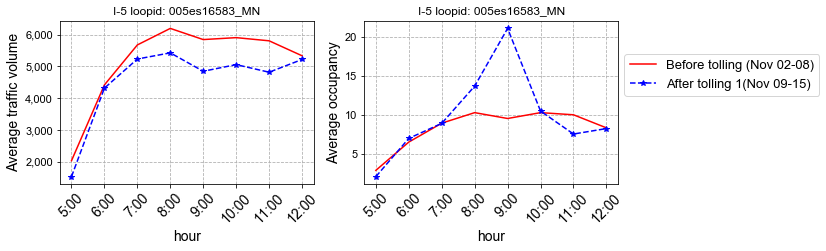

[1192.0, 2775.0, 4396.0, 5802.0, 5787.0, 5796.0, 5533.0, 5071.0]
[1.775, 3.875, 6.25, 9.15, 8.65, 19.525, 12.625, 7.85]
[1232.0, 2690.0, 4169.0, 5091.0, 4256.0, 5295.0, 4981.0, 5434.0]
[1.875, 4.025, 6.55, 9.15, 37.65, 25.275, 10.225, 16.825]
[1199.0, 2660.0, 4145.0, 5434.0, 4890.0, 5240.0, 5606.0, 5333.0]
[1.925, 3.85, 6.2, 13.1, 35.7, 16.85, 19.45, 7.975]


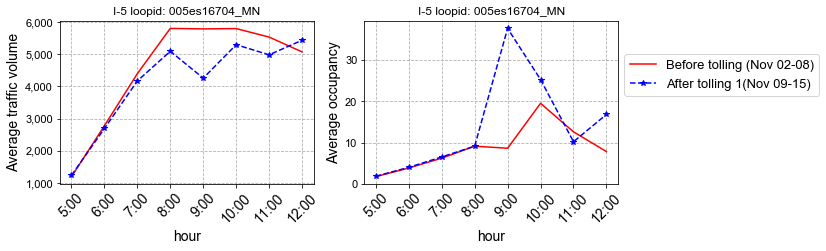

[509.0, 1536.0, 3260.0, 3384.0, 3503.0, 3147.0, 2746.0, 1974.0]
[1.333, 4.1, 10.967, 19.2, 17.1, 18.5, 9.1, 5.667]
[463.0, 1317.0, 2860.0, 3276.0, 3185.0, 3242.0, 2937.0, 2746.0]
[1.2, 3.667, 9.5, 14.0, 14.367, 15.167, 10.867, 9.067]
[411.0, 1281.0, 2883.0, 3350.0, 3223.0, 3078.0, 2820.0, 2324.0]
[1.1, 3.5, 9.533, 14.1, 15.9, 14.7, 10.533, 7.0]


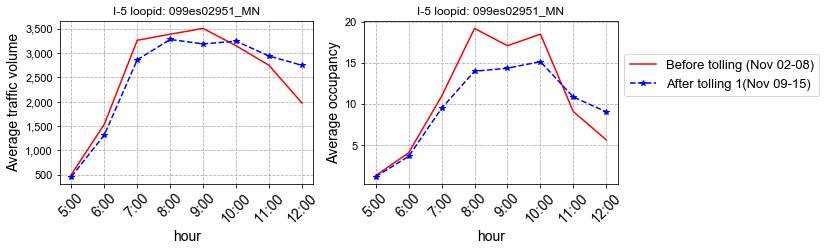

[276.0, 594.0, 1274.0, 1960.0, 1682.0, 1513.0, 1384.0, 1470.0]
[0.633, 1.367, 3.0, 4.533, 4.0, 3.8, 3.533, 3.833]
[242.0, 530.0, 1055.0, 1818.0, 1598.0, 1515.0, 1325.0, 1393.0]
[0.567, 1.3, 2.567, 4.5, 3.933, 3.867, 3.433, 3.533]
[207.0, 540.0, 1077.0, 1764.0, 1565.0, 1458.0, 1250.0, 1405.0]
[0.5, 1.3, 2.533, 4.3, 3.733, 3.767, 3.267, 3.6]


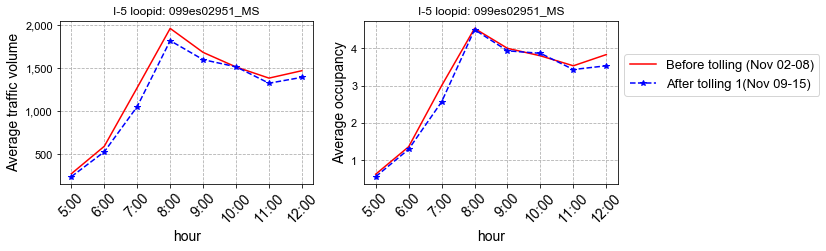

[166.0, 621.0, 1535.0, 2008.0, 1977.0, 2300.0, 2126.0, 1762.0]
[0.433, 1.367, 3.733, 4.9, 4.833, 6.067, 5.667, 4.5]
[113.0, 477.0, 1200.0, 1802.0, 1898.0, 2272.0, 1979.0, 1915.0]
[0.333, 1.133, 3.233, 4.7, 4.8, 5.9, 5.0, 4.8]
[126.0, 436.0, 1254.0, 1760.0, 1993.0, 2047.0, 1988.0, 1580.0]
[0.3, 1.0, 3.3, 4.5, 5.2, 5.267, 5.267, 4.0]


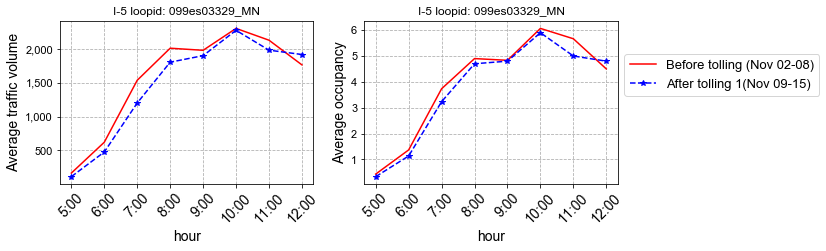

[249.0, 626.0, 1715.0, 2847.0, 2786.0, 2280.0, 1628.0, 1539.0]
[0.9, 2.15, 6.2, 11.4, 11.3, 9.05, 6.4, 6.0]
[186.0, 503.0, 1501.0, 2904.0, 2089.0, 2436.0, 1765.0, 1523.0]
[0.65, 1.8, 5.8, 17.05, 35.45, 28.75, 9.15, 6.15]
[188.0, 495.0, 1454.0, 2801.0, 2536.0, 2379.0, 1603.0, 1384.0]
[0.65, 1.8, 5.4, 17.2, 24.0, 24.5, 6.75, 5.55]


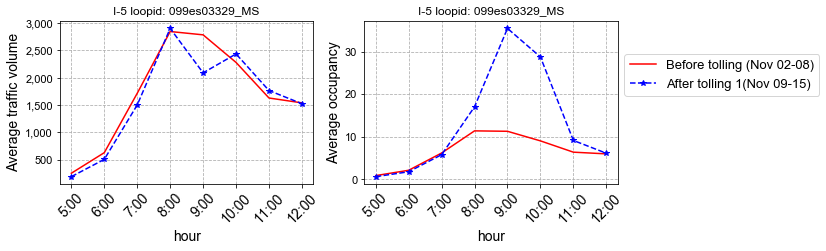

In [148]:
plotvolandoccu(lgatbt, loop_vol2, loop_occupancy2, 4, 12, 1, 1)

In [77]:
# make legend for AC period, BC period and AO period
lgacbcao = ['Before closure (Jan 05-11)','After closure (Jan 12-18)','After opening 2 (Mar 16-22)']
# make legend for AT period, BT period
lgatbt = ['Before tolling (Nov 02-08)','After tolling 1(Nov 09-15)','After tolling 2 (Nov 16-22)']



In [66]:
Cal_Avg_Hr(loop_vol1, 5, 9, 1, 3)

{'005es16186_MN': {'BC': [0, 0, 0, 0],
  'AC': [0, 0, 0, 0],
  'AO2': [6766.222, 6043.0, 5738.0, 4981.0]},
 '005es16237_MN': {'BC': [6046.667, 5299.0, 4245.667, 4096.0],
  'AC': [5978.333, 4376.0, 3870.333, 3468.333],
  'AO2': [6248.0, 5494.0, 5224.0, 4597.0]},
 '005es16272_MN': {'BC': [4789.333, 3982.667, 3099.667, 2963.667],
  'AC': [4586.333, 3244.667, 2799.667, 2493.0],
  'AO2': [4787.833, 4129.667, 3770.333, 3337.333]},
 '005es16272_MS': {'BC': [3848.0, 5722.667, 6046.0, 4906.889],
  'AC': [4222.333, 5574.0, 5794.333, 5346.667],
  'AO2': [0, 0, 0, 0]},
 '005es16302_MN': {'BC': [5040.333, 4260.0, 3284.0, 3191.667],
  'AC': [4865.667, 3487.333, 3004.333, 2687.333],
  'AO2': [5242.667, 4416.667, 4041.333, 3553.0]},
 '005es16319_MN': {'BC': [4811.333, 4011.667, 3100.333, 3012.0],
  'AC': [4653.333, 3286.667, 2812.0, 2531.0],
  'AO2': [4808.167, 4198.333, 3832.667, 3350.667]},
 '005es16377_MN': {'BC': [5610.333, 5270.667, 4355.333, 4284.667],
  'AC': [5543.667, 4399.667, 4023.0, 3655.3

In [70]:
Cal_Avg_Hr(loop_occupancy1, 5, 9, 1, 3)

{'005es16186_MN': {'BC': [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  'AC': [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  'AO2': [[10.56666666666666, 11.6, 15.76666666666667],
   [27.475, 31.925, 33.4],
   [33.0, 34.625, 31.2],
   [37.25, 40.425, 36.075]]},
 '005es16237_MN': {'BC': [[10.1, 14.125, 11.35],
   [29.35, 25.125, 25.425],
   [35.025, 34.27500000000001, 33.575],
   [34.15, 37.175, 36.05]],
  'AC': [[19.95, 17.625, 17.575],
   [36.40000000000001, 31.7, 31.625],
   [36.45, 37.95, 37.2],
   [42.025, 40.875, 36.75]],
  'AO2': [[10.4, 11.375, 15.225],
   [24.075, 26.675, 27.275],
   [32.35, 30.0, 29.4],
   [33.9, 34.85, 32.7]]},
 '005es16272_MN': {'BC': [[9.433333333333332, 10.86666666666667, 9.2],
   [32.09999999999999, 22.66666666666667, 25.86666666666666],
   [37.26666666666666, 38.3, 38.03333333333333],
   [37.46666666666667, 41.1, 39.23333333333333]],
  'AC': [[24.8, 18.3, 18.7],
   [42.0, 35.73333333333333, 34.83333333333334],
   [43.2, 41.86666666666667, 42.03333333333

In [21]:
# Daily
# weekday
WeekAvg, DayAvg = CalVol(loop_vol1, 0, 24, 1, 3)
# weekend
WeekAvg_kd, DayAvg_kd = CalVol(loop_vol1, 0, 24, 5, 6)

# morning peak 6:00 am - 10:00 am 
# weekday
WeekAvg_mor, DayAvg_mor = CalVol(loop_vol1, 5, 12, 1, 3)
# weekend
WeekAvg_mor_kd, DayAvg_mor_kd = CalVol(loop_vol1, 5, 12, 5, 6)

# evening peak 3:00 pm - 7:00 pm (15:00 - 19:00)
# weekday
WeekAvg_eve, DayAvg_eve = CalVol(loop_vol1, 15, 20, 1, 3)
# weekend
WeekAvg_eve_kd, DayAvg_eve_kd = CalVol(loop_vol1, 15, 20, 5, 6)

#calculate average hourly traffic volume
AvgLPhr,AvgHr = CalHourAvg(loop_vol1, 0, 6, ['N','S'], ['005'])
AvgLPhr_wd_acbc,AvgHr_wd_acbc = CalHourAvg(loop_vol1, 1, 3,['N','S'], ['005'])
AvgLPhr_wk_acbc,AvgHr_wk_acbc = CalHourAvg(loop_vol1, 5, 6,['N','S'], ['005'])
AvgLPhr_wd_atbt,AvgHr_wd_atbt = CalHourAvg(loop_vol2, 1, 3,['N','S'], ['005'])
AvgLPhr_wk_atbt,AvgHr_wk_atbt = CalHourAvg(loop_vol2, 5, 6,['N','S'], ['005'])

<Figure size 960x640 with 0 Axes>

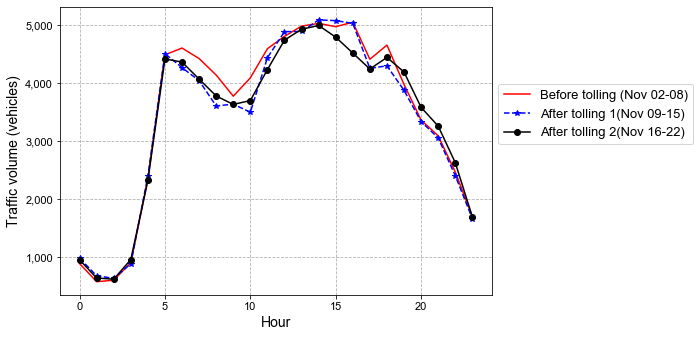

<Figure size 960x640 with 0 Axes>

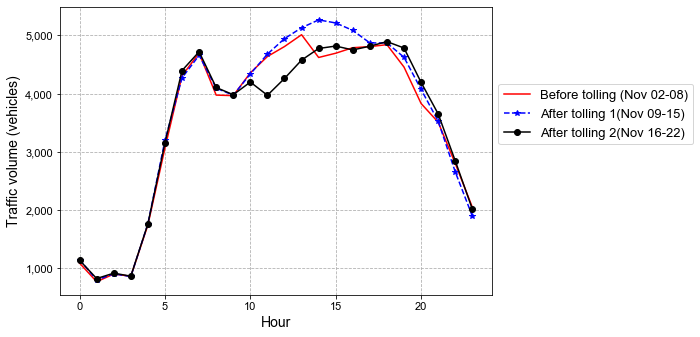

<Figure size 960x640 with 0 Axes>

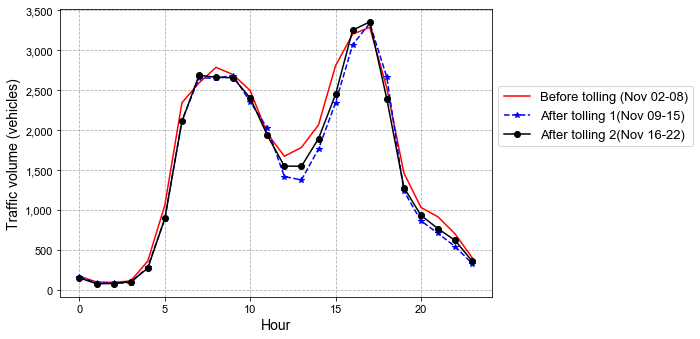

<Figure size 960x640 with 0 Axes>

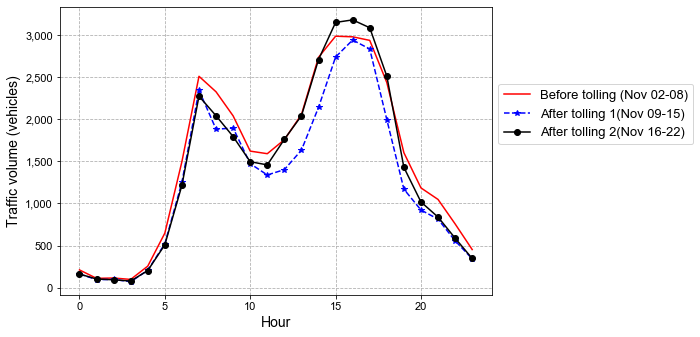

In [9]:
# I5
lgatbt = ['Before tolling (Nov 02-08)','After tolling 1(Nov 09-15)','After tolling 2(Nov 16-22)']
p = 'G:/My Drive/2020/FHWA/FHWA_2020_plot/Loop/'
AvgLPhr_wd_atbt,AvgHr_wd_atbt = CalHourAvg(loop_vol2, 1, 3,['N'],['005'])
hourlyplot(AvgHr_wd_atbt, ' (weekday, I5 NB)', lgatbt, p+'atbt_hr_wd_i5n.jpg')
AvgLPhr_wd_atbt,AvgHr_wd_atbt = CalHourAvg(loop_vol2, 1, 3,['S'],['005'])
hourlyplot(AvgHr_wd_atbt, ' (weekday, I5 SB)', lgatbt, p+'atbt_hr_wd_i5s.jpg')
AvgLPhr_wd_atbt,AvgHr_wd_atbt = CalHourAvg(loop_vol2, 1, 3, ['N'],['099'])
hourlyplot(AvgHr_wd_atbt, ' (weekday, SR99 NB)', lgatbt, p+'atbt_hr_wd_sr99n.jpg')
AvgLPhr_wd_atbt,AvgHr_wd_atbt = CalHourAvg(loop_vol2, 1, 3, ['S'],['099'])
hourlyplot(AvgHr_wd_atbt, ' (weekday, SR99 SB)', lgatbt, p+'atbt_hr_wd_sr99s.jpg')

<Figure size 960x640 with 0 Axes>

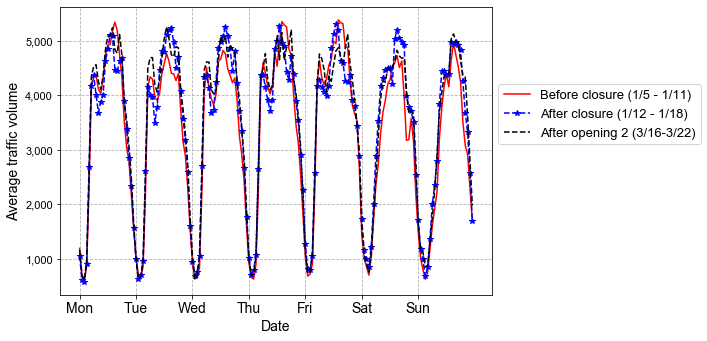

<Figure size 960x640 with 0 Axes>

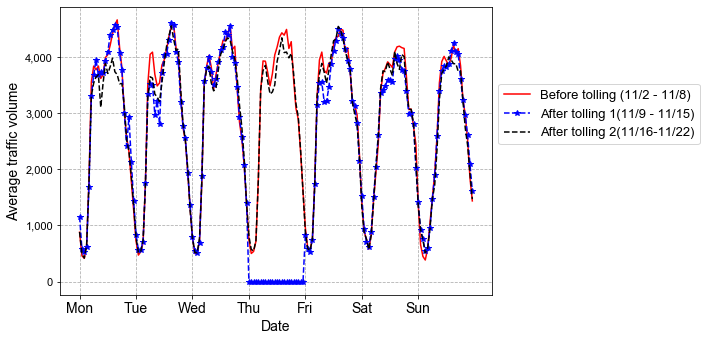

<Figure size 960x640 with 0 Axes>

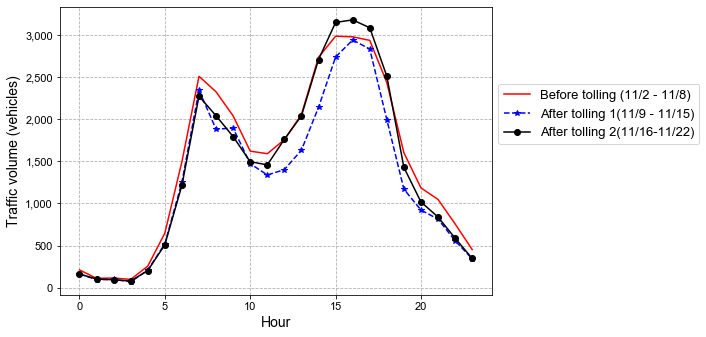

<Figure size 960x640 with 0 Axes>

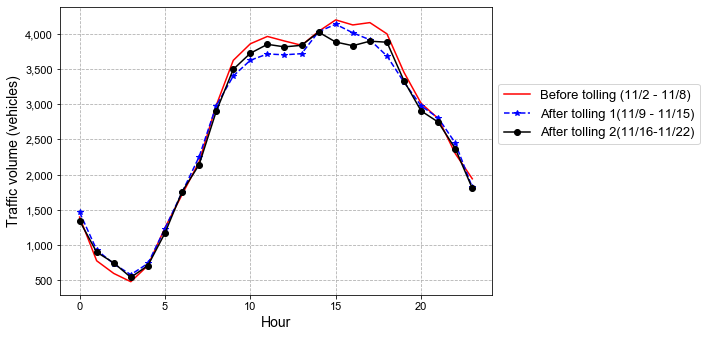

<Figure size 960x640 with 0 Axes>

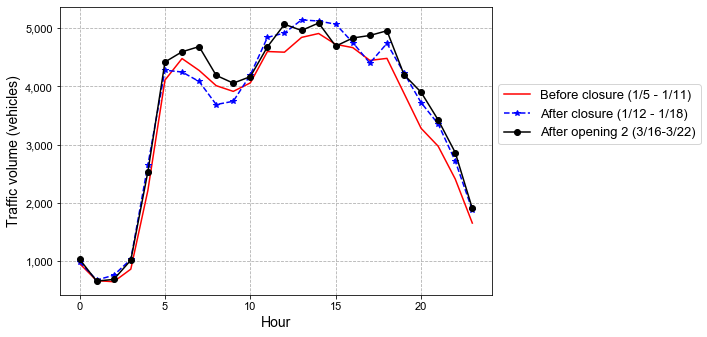

<Figure size 960x640 with 0 Axes>

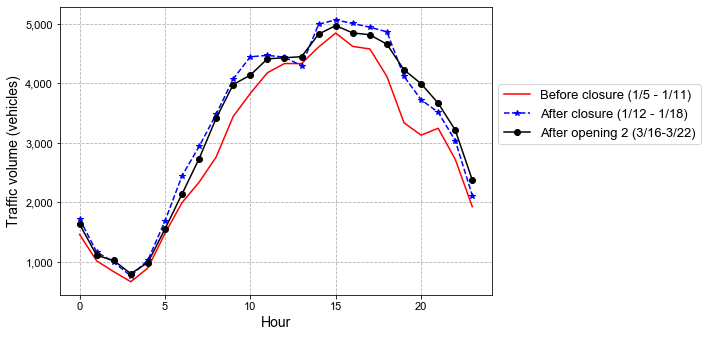

In [10]:
# make legend for AC period, BC period and AO period
lgacbcao = ['Before closure (1/5 - 1/11)','After closure (1/12 - 1/18)','After opening 2 (3/16-3/22)']
# make legend for AT period, BT period
lgatbt = ['Before tolling (11/2 - 11/8)','After tolling 1(11/9 - 11/15)','After tolling 2(11/16-11/22)']

# plot hourly average
p = 'G:/My Drive/2020/FHWA/FHWA_2020_plot/Loop/'
plothr(lgacbcao, loop_vol1, p+'acbc_daily_avg.jpg')
plothr(lgatbt, loop_vol2, p+'atbt_daily_avg.jpg')
#tidedictandplot(AvgHr, '')
hourlyplot(AvgHr_wd_atbt, ' (weekday)', lgatbt, p+'atbt_hr_avg_wd.jpg')
hourlyplot(AvgHr_wk_atbt, ' (weekend)', lgatbt, p+'atbt_hr_avg_wk.jpg')
hourlyplot(AvgHr_wd_acbc, ' (weekday)', lgacbcao, p+'acbc_hr_avg_wd.jpg')
hourlyplot(AvgHr_wk_acbc, ' (weekend)', lgacbcao, p+'acbc_hr_avg_wk.jpg')

In [30]:
loop_vol1

{'005es16186_MN': {'BC': {datetime.datetime(2019, 1, 5, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0],
   datetime.datetime(2019, 1, 6, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0],
   datetime.datetime(2019, 1, 7, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0],
   datetime.datetime(2019, 1, 8, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0],
   datetime.datetime(2019, 1, 9, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    

In [29]:
loop_occupancy1

{'005es16186_MN': {'BC': {datetime.datetime(2019, 1, 5, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0],
   datetime.datetime(2019, 1, 6, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0],
   datetime.datetime(2019, 1, 7, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0],
   datetime.datetime(2019, 1, 8, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0],
   datetime.datetime(2019, 1, 9, 0, 0): [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    

In [ ]:
Cal_Avg = 
for loop_id in loop_vol1:
    

In [79]:
# save data for plot
p = 'G:/My Drive/2020/FHWA/FHWA_2020_plot/Loop/'
savedailydata('loop_acbc_day.csv', p, loop_vol1)
savedailydata('loop_atbt_day.csv', p, loop_vol2)
saveavghourlydata('loop_acbc_hr_wd.csv', p, AvgHr_wd_acbc)
saveavghourlydata('loop_acbc_hr_wk.csv', p, AvgHr_wk_acbc)
saveavghourlydata('loop_atbt_hr_wd.csv', p, AvgHr_wd_atbt)
saveavghourlydata('loop_atbt_hr_wk.csv', p, AvgHr_wk_atbt)

In [23]:
# write csv
def make_row(bc, ac, ao2, sesid, loc):
    row = {}
    row['sensys id'] = sesid
    row['bc_avg'] = bc
    row['ac_avg'] = ac
    row['ao1_avg'] = None
    row['ao2_avg'] = ao2
    row['bcac_vol'] = row['ac_avg'] - row['bc_avg']
    row['bcao1_vol'] = None
    row['acao1_vol'] = None
    row['ao1ao2_vol'] = None
    row['bcao1_per'] = None
    row['acao1_per'] = None
    row['ao1ao2_per'] = None
    row['lat'] = loc[sesid][0]
    row['lon'] = loc[sesid][1]
    row['direction'] = sesid[-1]+'BT'
    if ao2 == 0:
        row['bcao2_vol'] = None
        row['acao2_vol'] = None
        row['bcao2_per'] = None
        row['acao2_per'] = None
    else:
        if bc == 0:
            row['bcao2_per'] = 0
            row['bcac_per'] = 0
        if ac == 0:
            row['acao2_per'] =0
        else:            
            row['bcao2_vol'] = row['ao2_avg'] - row['bc_avg']
            row['acao2_vol'] = row['ao2_avg'] - row['ac_avg']
            row['bcao2_per'] = round(row['bcao2_vol']/row['bc_avg'],5)
            row['acao2_per'] = round(row['acao2_vol']/row['ac_avg'],5)
            row['bcac_per'] = round(row['bcac_vol']/row['bc_avg'],5)
    return(row)

def write_csv(csvname, Avgvollst, loclst):
    with open(csvname, 'w', newline='') as csvfile:
        colnames = ['sensys id', 'bc_avg','ac_avg','ao1_avg','ao2_avg','bcac_per','bcao1_per','bcao2_per','acao1_per','acao2_per','ao1ao2_per','bcac_vol','bcao1_vol','bcao2_vol','acao1_vol','acao2_vol','ao1ao2_vol','lat','lon','direction']
        writer = csv.DictWriter(csvfile, fieldnames=colnames)
        writer.writeheader()
        for loopid in Avgvollst:
            bc = Avgvollst[loopid]['BC']
            ac = Avgvollst[loopid]['AC']
            ao2 = Avgvollst[loopid]['AO2']
            row = make_row(bc, ac, ao2, loopid, loclst)
            writer.writerow(row)

In [25]:
p

'G:/My Drive/2020/FHWA/FHWA_2020_plot/Loop/'

In [24]:
write_csv(p+'lp_weekday_acbc_formap.csv', WeekAvg,  get_loop_location(loop_vol1, p1))
write_csv(p+'lp_weekend_acbc_formap.csv', WeekAvg_kd, get_loop_location(loop_vol1, p1))
write_csv(p+'lp_mor_weekday_acbc_formap.csv',WeekAvg_mor, get_loop_location(loop_vol1, p1))
write_csv(p+'lp_mor_weekend_acbc_formap.csv',WeekAvg_mor_kd, get_loop_location(loop_vol1, p1))
write_csv(p+'lp_eve_weekday_acbc_formap.csv',WeekAvg_eve, get_loop_location(loop_vol1, p1))
write_csv(p+'lp_eve_weekend_acbc_formap.csv',WeekAvg_eve_kd, get_loop_location(loop_vol1, p1))

In [13]:
def make_row(bt, at1, at2, sesid, loc):
    row = {}
    row['sensys id'] = sesid
    row['bt_avg'] = bt
    row['at1_avg'] = at1
    row['at2_avg'] = at2
    row['btat1_vol'] = row['at1_avg'] - row['bt_avg']
    row['btat2_vol'] = row['at2_avg'] - row['bt_avg']
    row['at1at2_vol'] = row['at2_avg'] - row['at1_avg']
    row['btat1_per'] = round(row['btat1_vol']/row['bt_avg'],5)
    row['btat2_per'] = round(row['btat2_vol']/row['bt_avg'],5)
    row['at1at2_per'] = round(row['at1at2_vol'] /row['at1_avg'],5)
    row['lat'] = loc[sesid][0]
    row['lon'] = loc[sesid][1]
    row['direction'] = sesid[-3:]
    return(row)

def write_csv(csvname, Avgvollst, loclst):
    with open(csvname, 'w', newline='') as csvfile:
        colnames = ['sensys id', 'bt_avg','at1_avg','at2_avg','btat1_vol','btat2_vol','at1at2_vol','btat1_per','btat2_per','at1at2_per','lat','lon','direction']
        writer = csv.DictWriter(csvfile, fieldnames=colnames)
        writer.writeheader()
        for loopid in Avgvollst:
            bt = Avgvollst[loopid]['BT']
            at1 = Avgvollst[loopid]['AT1']
            at2 = Avgvollst[loopid]['AT2']
            row = make_row(bt, at1, at2, loopid, loclst)
            writer.writerow(row)   
    

In [14]:
# Daily
# weekday
WeekAvg, DayAvg = CalVol(loop_vol2, 0, 24, 1, 3)
# weekend
WeekAvg_kd, DayAvg_kd = CalVol(loop_vol2, 0, 24, 5, 6)

# morning peak 6:00 am - 10:00 am 
# weekday
WeekAvg_mor, DayAvg_mor = CalVol(loop_vol2, 5, 12, 1, 3)
# weekend
WeekAvg_mor_kd, DayAvg_mor_kd = CalVol(loop_vol2, 5, 12, 5, 6)

# evening peak 3:00 pm - 7:00 pm (15:00 - 19:00)
# weekday
WeekAvg_eve, DayAvg_eve = CalVol(loop_vol2, 14, 20, 1, 3)
# weekend
WeekAvg_eve_kd, DayAvg_eve_kd = CalVol(loop_vol2, 14, 20, 5, 6)


In [3]:
10/60

0.16666666666666666

In [87]:
write_csv(p+'lp_weekday_atbt_formap.csv', WeekAvg,  get_loop_location(loop_vol2, p2))
write_csv(p+'lp_weekend_atbt_formap.csv', WeekAvg_kd, get_loop_location(loop_vol2, p2))
write_csv(p+'lp_mor_weekday_atbt_formap.csv',WeekAvg_mor, get_loop_location(loop_vol2, p2))
write_csv(p+'lp_mor_weekend_atbt_formap.csv',WeekAvg_mor_kd, get_loop_location(loop_vol2, p2))
write_csv(p+'lp_eve_weekday_atbt_formap.csv',WeekAvg_eve, get_loop_location(loop_vol1, p2))
write_csv(p+'lp_eve_weekend_atbt_formap.csv',WeekAvg_eve_kd, get_loop_location(loop_vol2, p2))